# Traditional Visualization

1. Buatlah 3 Business Question
2. Visualisasikan Business Question tersebut menggunakan library Python (Seaborn, Matplotlib, dll)
3. Berikan rekomendasi atas pertanyaan atau permasalahan yang ditemukan pada visualisasi.
4. Kerjakan di Notebook pilihan kalian dengan format penamaan tugas : EDA_No-Kelompok_Nama.ipynb
5. Optional Dataset dapat dipilih sebagai alternatif dataset dan berlaku kepada semua soal.


# Import Data and Libraries

In [ ]:
pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import squarify    # pip install squarify (algorithm for treemap)

import statsmodels.api as sm

%matplotlib inline

In [ ]:
dataset = "https://raw.githubusercontent.com/Pieter414/BCCInternProject/main/air_pollution.csv"

df = pd.read_csv(dataset)

# Data Overview

In [ ]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df.tail()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate
23462,Malaysia,Marang,70,Moderate,1,Good,38,Good,0,Good,70,Moderate


In [ ]:
df.shape

(23463, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [ ]:
df.describe(include="all")

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
count,23036,23462,23463.000000,23463,23463.000000,23463,23463.000000,23463,23463.000000,23463,23463.000000,23463
unique,175,23462,NaN,6,NaN,3,NaN,5,NaN,2,NaN,6
top,United States of America,Praskoveya,NaN,Good,NaN,Good,NaN,Good,NaN,Good,NaN,Good
freq,2872,1,NaN,9936,NaN,23460,NaN,21069,NaN,23448,NaN,10208
mean,NaN,NaN,72.010868,NaN,1.368367,NaN,35.193709,NaN,3.063334,NaN,68.519755,NaN
std,NaN,NaN,56.055220,NaN,1.832064,NaN,28.098723,NaN,5.254108,NaN,54.796443,NaN
min,NaN,NaN,6.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,39.000000,NaN,1.000000,NaN,21.000000,NaN,0.000000,NaN,35.000000,NaN
50%,NaN,NaN,55.000000,NaN,1.000000,NaN,31.000000,NaN,1.000000,NaN,54.000000,NaN
75%,NaN,NaN,79.000000,NaN,1.000000,NaN,40.000000,NaN,4.000000,NaN,79.000000,NaN


In [ ]:
df.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

### Value Analysis

In [ ]:
def show_value_count(data, label):
  value_count = data[label].value_counts()

  print(f"\nPersebaran dari kolom {label}: \n{value_count}")

In [ ]:
column_types = df.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Country',
 'City',
 'AQI Category',
 'CO AQI Category',
 'Ozone AQI Category',
 'NO2 AQI Category',
 'PM2.5 AQI Category']

In [ ]:
integer_columns = column_types[column_types == 'int64'].index.tolist()
integer_columns

['AQI Value',
 'CO AQI Value',
 'Ozone AQI Value',
 'NO2 AQI Value',
 'PM2.5 AQI Value']

In [ ]:
for column in object_columns:
  show_value_count(df, column)


Persebaran dari kolom Country: 
United States of America    2872
India                       2488
Brazil                      1562
Germany                     1345
Russian Federation          1241
                            ... 
Vanuatu                        1
Solomon Islands                1
Republic of Korea              1
Saint Lucia                    1
Monaco                         1
Name: Country, Length: 175, dtype: int64

Persebaran dari kolom City: 
Praskoveya        1
Dinklage          1
Dera Din Panah    1
De Pere           1
Damghan           1
                 ..
Vinces            1
Vila              1
Ciudad Valles     1
Citeureup         1
Marang            1
Name: City, Length: 23462, dtype: int64

Persebaran dari kolom AQI Category: 
Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
N

In [ ]:
for column in integer_columns:
  show_value_count(df, column)


Persebaran dari kolom AQI Value: 
50     483
35     473
34     446
39     433
36     427
      ... 
256      1
405      1
236      1
376      1
253      1
Name: AQI Value, Length: 347, dtype: int64

Persebaran dari kolom CO AQI Value: 
1      14867
0       3110
2       3012
3       1205
4        656
5        234
6        113
7         66
9         39
8         38
10        30
11        16
12        16
15        11
13        10
16         8
14         5
21         4
19         3
23         2
22         2
20         2
28         2
18         2
41         1
36         1
49         1
35         1
27         1
51         1
67         1
133        1
31         1
17         1
Name: CO AQI Value, dtype: int64

Persebaran dari kolom Ozone AQI Value: 
30     713
32     684
29     671
28     664
33     663
      ... 
199      1
189      1
222      1
235      1
214      1
Name: Ozone AQI Value, Length: 213, dtype: int64

Persebaran dari kolom NO2 AQI Value: 
0     8242
1     4665
2     2715
3    

## Missing Value

In [ ]:
missing_data_country = df[df["Country"].isna()]
missing_data_country

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
535,NaN,Granville,30,Good,1,Good,30,Good,3,Good,25,Good
654,NaN,Kingston Upon Hull,33,Good,1,Good,17,Good,8,Good,33,Good
787,NaN,New Waterford,20,Good,1,Good,18,Good,9,Good,20,Good
801,NaN,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy
906,NaN,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
22979,NaN,Kyaikkami,54,Moderate,0,Good,20,Good,0,Good,54,Moderate
23115,NaN,Bima,25,Good,1,Good,25,Good,0,Good,24,Good
23311,NaN,Marapanim,25,Good,1,Good,15,Good,0,Good,25,Good
23345,NaN,Calbuco,36,Good,1,Good,15,Good,3,Good,36,Good


In [ ]:
missing_data_city = df[df["City"].isna()]
missing_data_city

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
2641,Israel,NaN,68,Moderate,1,Good,48,Good,4,Good,68,Moderate


## Duplicate Values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category


# Business Insight

SMART Method

- Specific
- Measurable
- Action Oriented
- Relevant
- Time Bound

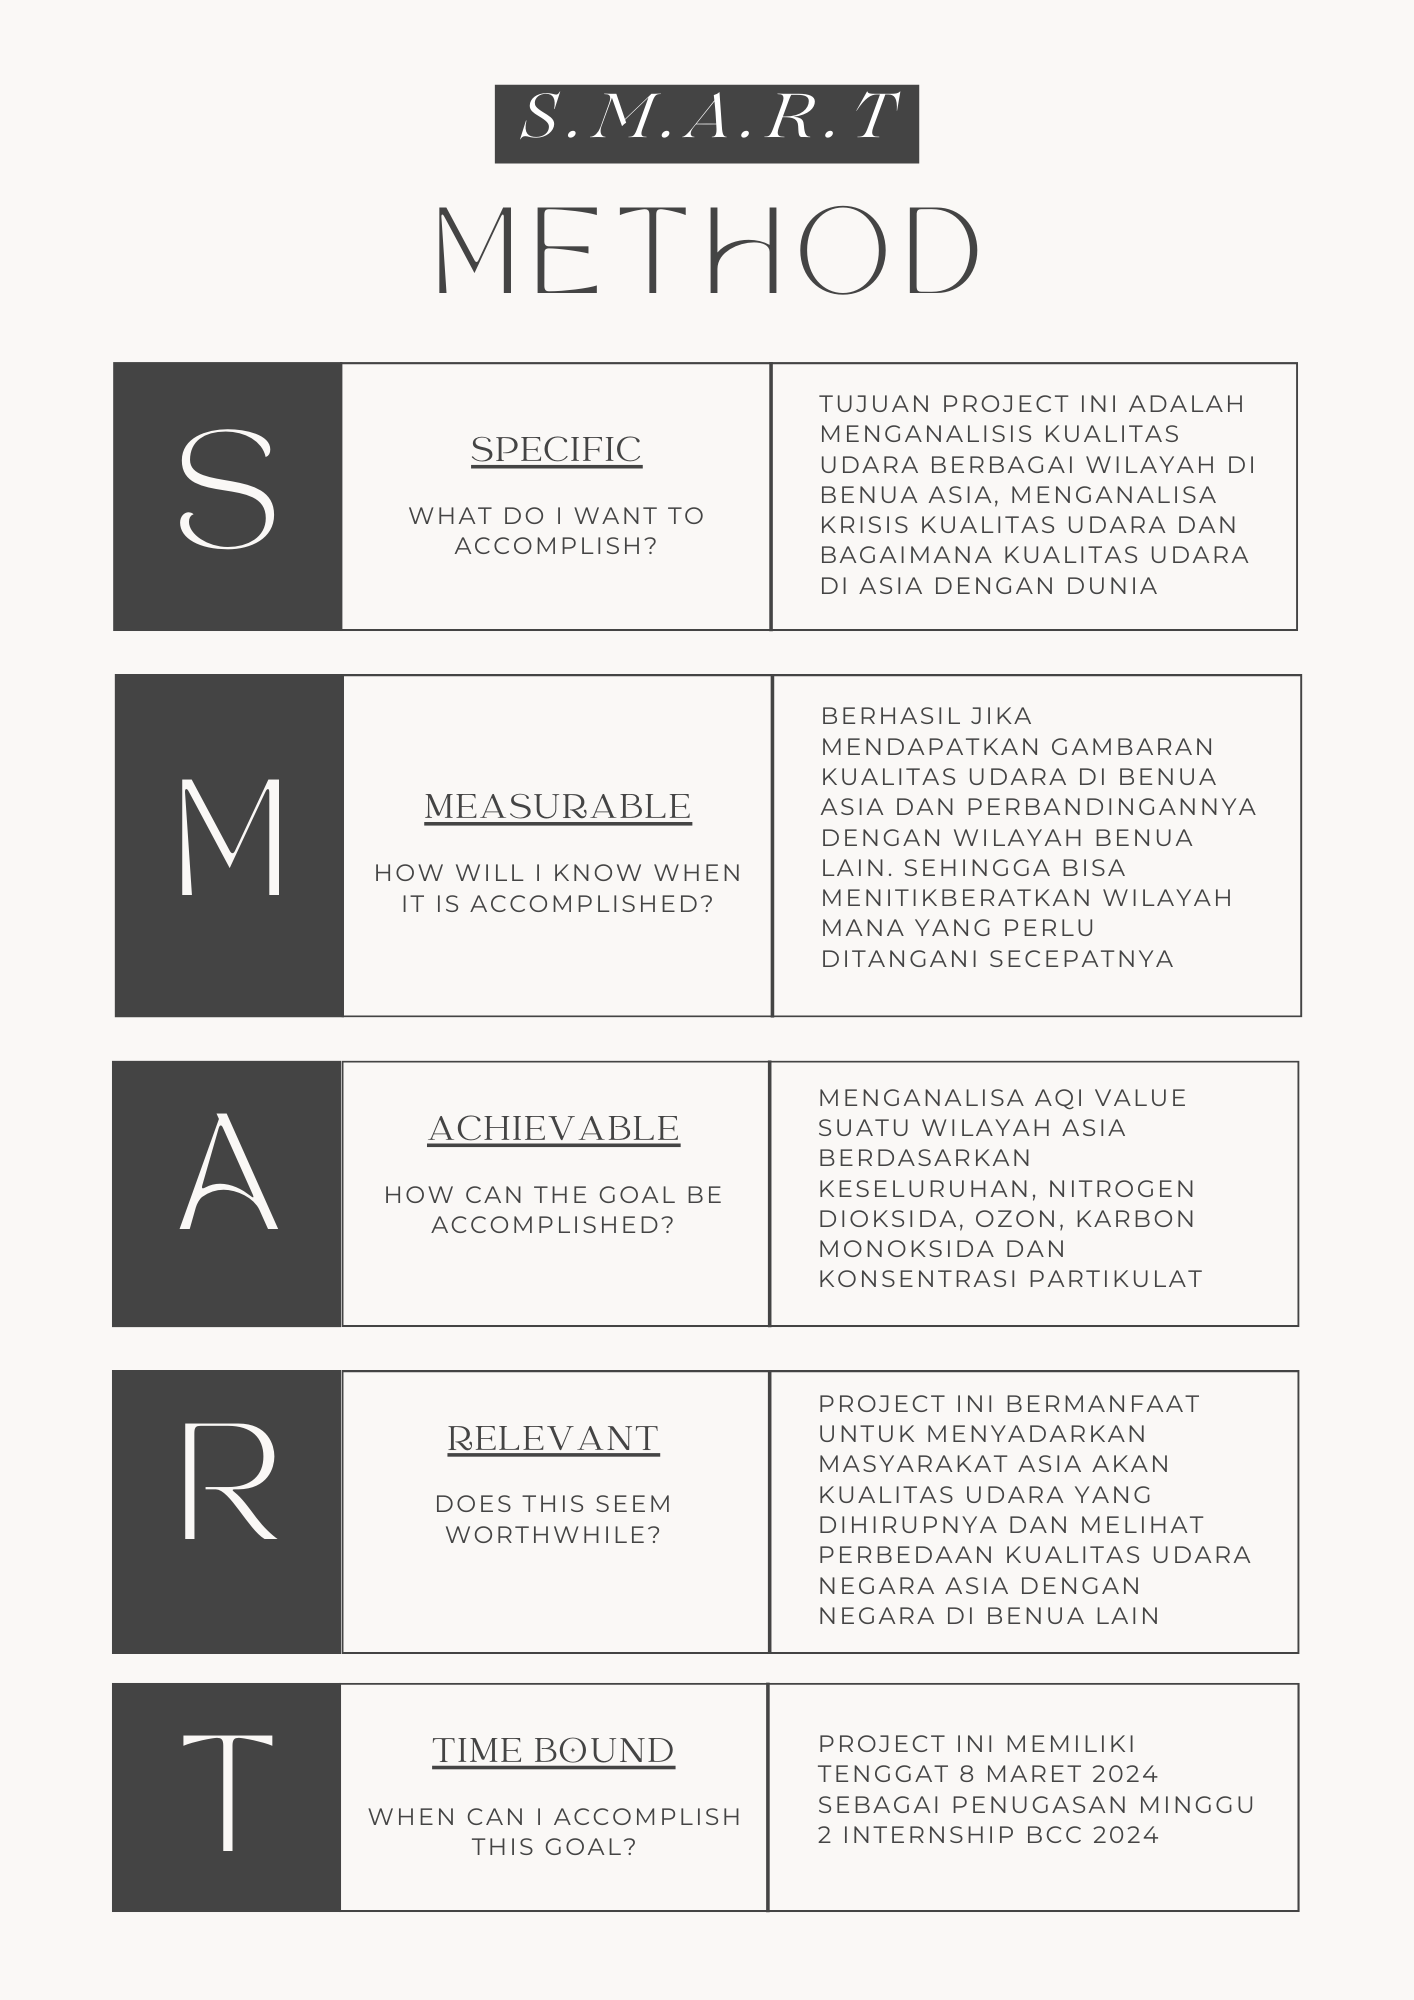

## Business Question

1. **Wilayah di Benua Asia yang memiliki kualitas udara terbaik dan kualitas udara terburuk?**
2. **Bagaimana persebaran AQI (Air Quality Index) baik secara keseluruhan, berdasarkan Nitrogen Dioksida, Ozone, Karbon Monoksida atau Konsentrasi Partikulat di wilayah Asia?** Terutama di beberapa negara krusial Asia?
3. **Bagaimana kualitas udara Asia dibandingkan dengan kualitas udara secara keseluruhan?** sehingga bisa menyimpulkan bagaimana kondisi udara dan tindakan yang perlu dilakukan

# Data Cleaning

Untuk kemudahan dari pengolahan dataset saat ini, maka dataset dengan Country 'NaN' dan City 'NaN' maka akan di drop

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [ ]:
df.shape

(23035, 12)

# Pre Visualization

Untuk definisi negara yang termasuk dalam Benua Asia, saya menggunakan list ini
[Wikipedia Negara Asia](https://en.wikipedia.org/wiki/Asia#Political_geography)

Note :
- Dalam list tersebut negara Timor Leste masih dikenal sebagai East Timor sehingga mengikuti nama yang sekarang
- Dalam list tersebut juga mencakup Mesir sebagai negara di Asia dikarenakan wilayahnya juga mencakup semenanjung Sinai, tetapi untuk kemudahan dataset ini, maka saya akan exclude dikarenakan Mesir dominan di wilayah Afrika
- Dalam list tersebut tidak mencantumkan Rusia sebagai bagian dari Asia dikarenakan wilayahnya yang terpecah bagian Eropa dan Asia sehingga tidak masuk list negara Asia (Alasan sama dengan Mesir)

Berikutnya mengenai pembagian regional Benua Asia berdasarkan [Geografis Asia](https://en.wikipedia.org/wiki/Asia#Geography)
- Asia Utara (Sebagian besar wilayah Rusia + Siberia)
- Asia Timur
- Asia Tengah
- Asia Selatan
- Asia Tenggara
- Asia Barat Daya (Timur Tengah)

In [ ]:
asia_countries = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
    'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
    'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
    'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia',
    'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste',
    'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
]

Berikutnya, membuat kolom baru untuk menandakan apakah negara yang disebut merupakan negara Asia

In [ ]:
df["In Asia"] = df["Country"].isin(asia_countries).astype(int)

In [ ]:
df.tail()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy,1
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,0
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good,1
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate,0
23462,Malaysia,Marang,70,Moderate,1,Good,38,Good,0,Good,70,Moderate,1


Membentuk DataFrame baru, yaitu :
- DataFrame keseluruhan (df)
- DataFrame negara Asia (asia_df)
- DataFrame negara selain asia (non_asia_df)

In [ ]:
asia_df = df[df["Country"].isin(asia_countries)]
asia_df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
10,China,Qinzhou,68,Moderate,2,Good,68,Moderate,1,Good,58,Moderate,1
12,India,Radaur,158,Unhealthy,3,Good,139,Unhealthy for Sensitive Groups,1,Good,158,Unhealthy,1
13,Pakistan,Radhan,158,Unhealthy,1,Good,50,Good,1,Good,158,Unhealthy,1
16,India,Rajgir,154,Unhealthy,3,Good,100,Unhealthy for Sensitive Groups,2,Good,154,Unhealthy,1
19,India,Phulabani,161,Unhealthy,2,Good,71,Moderate,0,Good,161,Unhealthy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23454,India,Konnur,86,Moderate,0,Good,23,Good,0,Good,86,Moderate,1
23455,China,Shaoguan,160,Unhealthy,3,Good,160,Unhealthy,1,Good,79,Moderate,1
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy,1
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good,1


In [ ]:
non_asia_df = df[~df["Country"].isin(asia_countries)]
non_asia_df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,0
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,0
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,0
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23453,United Kingdom of Great Britain and Northern I...,Urmston,33,Good,1,Good,30,Good,3,Good,33,Good,0
23456,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,0
23457,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,0
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,0


# Visualization

## Persebaran Negara yang direpresentasikan dalam dataset Global Pollution Index

### 20 Negara di dunia dengan representasi data terbanyak

In [ ]:
df_group_country = df.groupby("Country")["AQI Category"].count().sort_values(ascending=False)
df_group_country = pd.DataFrame(df_group_country).head(20)

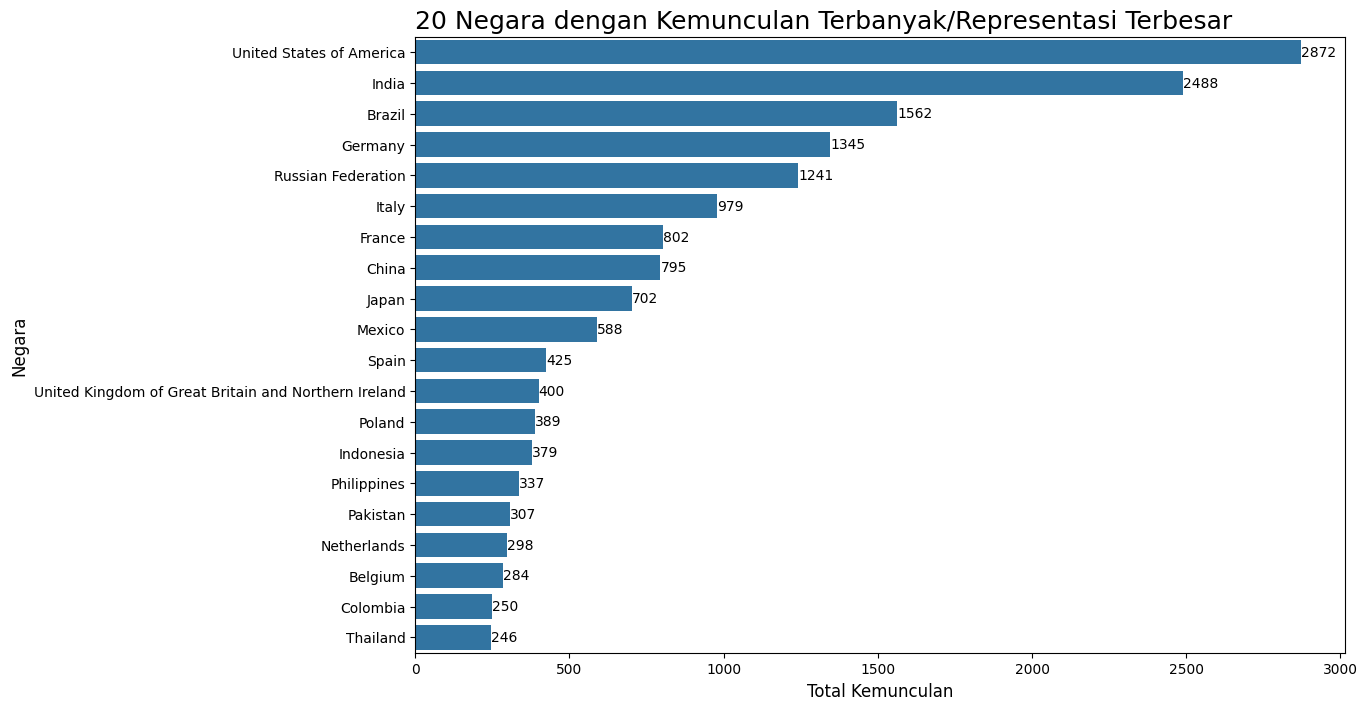

In [ ]:
# Menampilkan 20 negara di dunia dengan representasi terbesar di dataset ini
plt.figure(figsize=(12,8))
ax = sns.barplot(x="AQI Category", y = "Country", data=df_group_country, estimator="sum",)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title(f"{df_group_country.shape[0]} Negara dengan Kemunculan Terbanyak/Representasi Terbesar", loc="left", fontsize=18)
plt.xlabel("Total Kemunculan", fontsize=12)
plt.ylabel("Negara", fontsize=12)
plt.show()

### 20 Negara Asia dengan representasi data terbanyak

In [ ]:
df_group_asia= asia_df.groupby("Country")["AQI Category"].count().sort_values(ascending=False)
df_group_asia = pd.DataFrame(df_group_asia).head(20)

In [ ]:
# Menampilkan 20 negara di Asia dengan representasi terbesar di dataset ini
plt.figure(figsize=(12,8))
asia_ax = sns.barplot(x="AQI Category", y = "Country", data=df_group_asia, color="Green")
asia_ax.bar_label(asia_ax.containers[0], fontsize=10);
plt.title(f"{df_group_asia.shape[0]} Negara di Asia dengan Kemunculan Terbanyak/Representasi Terbesar", loc="left", fontsize=18)
plt.xlabel("Total Kemunculan", fontsize=12)
plt.ylabel("Negara", fontsize=12)
plt.show()

Melihat dari grafik tersebut, dari 20 negara di Asia dengan representasi terbesar terdapat 7 negara yang termasuk representasi terbesar yaitu :
1. India (2488 data)
2. China (795 data)
3. Japan (702 data)
4. Indonesia (379 data)
5. Philippines (337 data)
6. Pakistan (307 data)
7. Thailand (246 data)

## (1st Question) Total wilayah suatu negara melihat kualitas udara keseluruhan (AQI Value) di Benua Asia

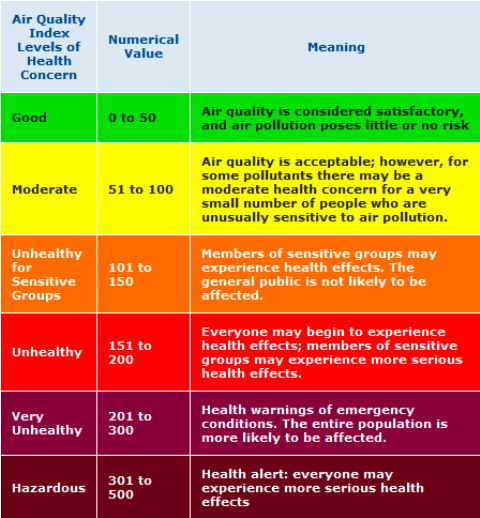

### Good (0 - 50)

In [ ]:
good_aqi = asia_df.sort_values("AQI Value", ascending=False)
good_aqi = good_aqi[good_aqi["AQI Category"] == "Good"]
good_aqi

In [ ]:
plt.figure(figsize=(75, 25))
good_aqi["Country"].value_counts().plot(kind='barh')
plt.title(f'Country Distribution of Good AQI Values', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
plt.show()

### Moderate (51 - 100)

In [ ]:
mod_aqi = asia_df.sort_values("AQI Value", ascending=False)
mod_aqi = mod_aqi[mod_aqi["AQI Category"] == "Moderate"]
mod_aqi

In [ ]:
plt.figure(figsize=(100, 25))
mod_aqi["Country"].value_counts().plot(kind='barh')
plt.title(f'Country Distribution of Moderate AQI Values', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
plt.show()

### Unhealthy for Sensitive Groups (101 - 150)

In [ ]:
unh1_aqi = asia_df.sort_values("AQI Value", ascending=False)
unh1_aqi = unh1_aqi[unh1_aqi["AQI Category"] == "Unhealthy for Sensitive Groups"]
unh1_aqi

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
4283,Pakistan,Sakrand,149,Unhealthy for Sensitive Groups,1,Good,23,Good,1,Good,149,Unhealthy for Sensitive Groups,1
21756,China,Dawukou,149,Unhealthy for Sensitive Groups,1,Good,42,Good,1,Good,149,Unhealthy for Sensitive Groups,1
3041,India,Chhapra,149,Unhealthy for Sensitive Groups,3,Good,99,Moderate,2,Good,149,Unhealthy for Sensitive Groups,1
16673,Pakistan,Kahuta,149,Unhealthy for Sensitive Groups,2,Good,129,Unhealthy for Sensitive Groups,0,Good,149,Unhealthy for Sensitive Groups,1
22922,India,Dhari,149,Unhealthy for Sensitive Groups,0,Good,27,Good,0,Good,149,Unhealthy for Sensitive Groups,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22601,Indonesia,Tayu,100,Unhealthy for Sensitive Groups,2,Good,100,Unhealthy for Sensitive Groups,1,Good,89,Moderate,1
21646,China,Lengshuitan,100,Unhealthy for Sensitive Groups,4,Good,92,Moderate,4,Good,100,Unhealthy for Sensitive Groups,1
16325,China,Changchun,100,Unhealthy for Sensitive Groups,3,Good,65,Moderate,4,Good,100,Unhealthy for Sensitive Groups,1
11075,India,Kharakvasla,100,Unhealthy for Sensitive Groups,1,Good,29,Good,1,Good,100,Unhealthy for Sensitive Groups,1


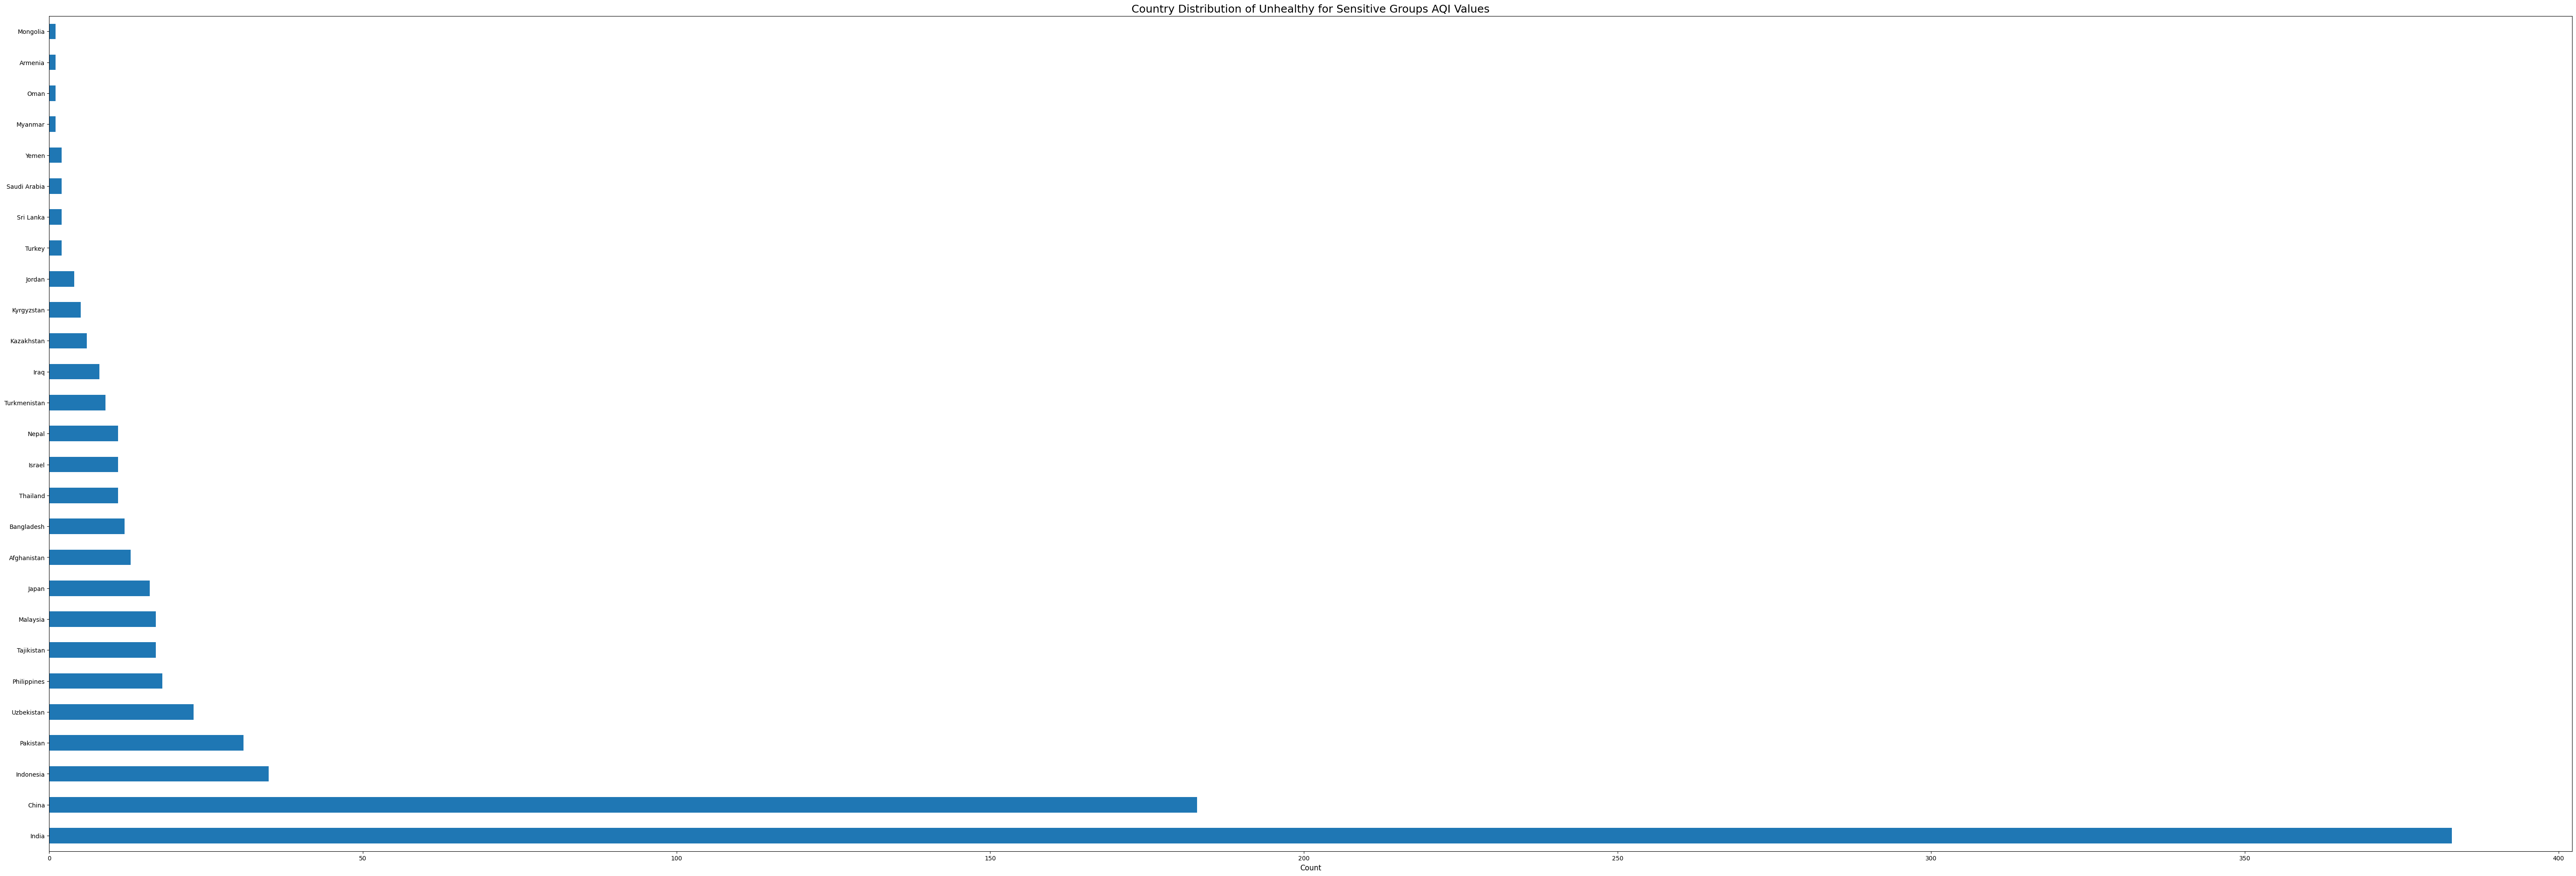

In [ ]:
plt.figure(figsize=(75, 25))
unh1_aqi["Country"].value_counts().plot(kind='barh')
plt.title(f'Country Distribution of Unhealthy for Sensitive Groups AQI Values', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
plt.show()

### Unhealthy (151 - 200)

In [ ]:
unh2_aqi = asia_df.sort_values("AQI Value", ascending=False)
unh2_aqi = unh2_aqi[unh2_aqi["AQI Category"] == "Unhealthy"]
unh2_aqi

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
21150,China,Handan,200,Unhealthy,5,Good,200,Unhealthy,7,Good,163,Unhealthy,1
20687,China,Dingtao,200,Unhealthy,4,Good,200,Unhealthy,3,Good,159,Unhealthy,1
18451,China,Linshui,200,Unhealthy,5,Good,200,Unhealthy,7,Good,163,Unhealthy,1
1210,China,Pengcheng,200,Unhealthy,5,Good,200,Unhealthy,7,Good,163,Unhealthy,1
11321,China,Lubu,200,Unhealthy,3,Good,200,Unhealthy,1,Good,109,Unhealthy for Sensitive Groups,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14039,Pakistan,Sujawal,150,Unhealthy,1,Good,36,Good,0,Good,150,Unhealthy,1
19368,Malaysia,Juru,150,Unhealthy,3,Good,27,Good,9,Good,150,Unhealthy,1
3377,China,Luyang,150,Unhealthy,2,Good,150,Unhealthy,2,Good,74,Moderate,1
835,India,Mandvi,150,Unhealthy,0,Good,27,Good,0,Good,150,Unhealthy,1


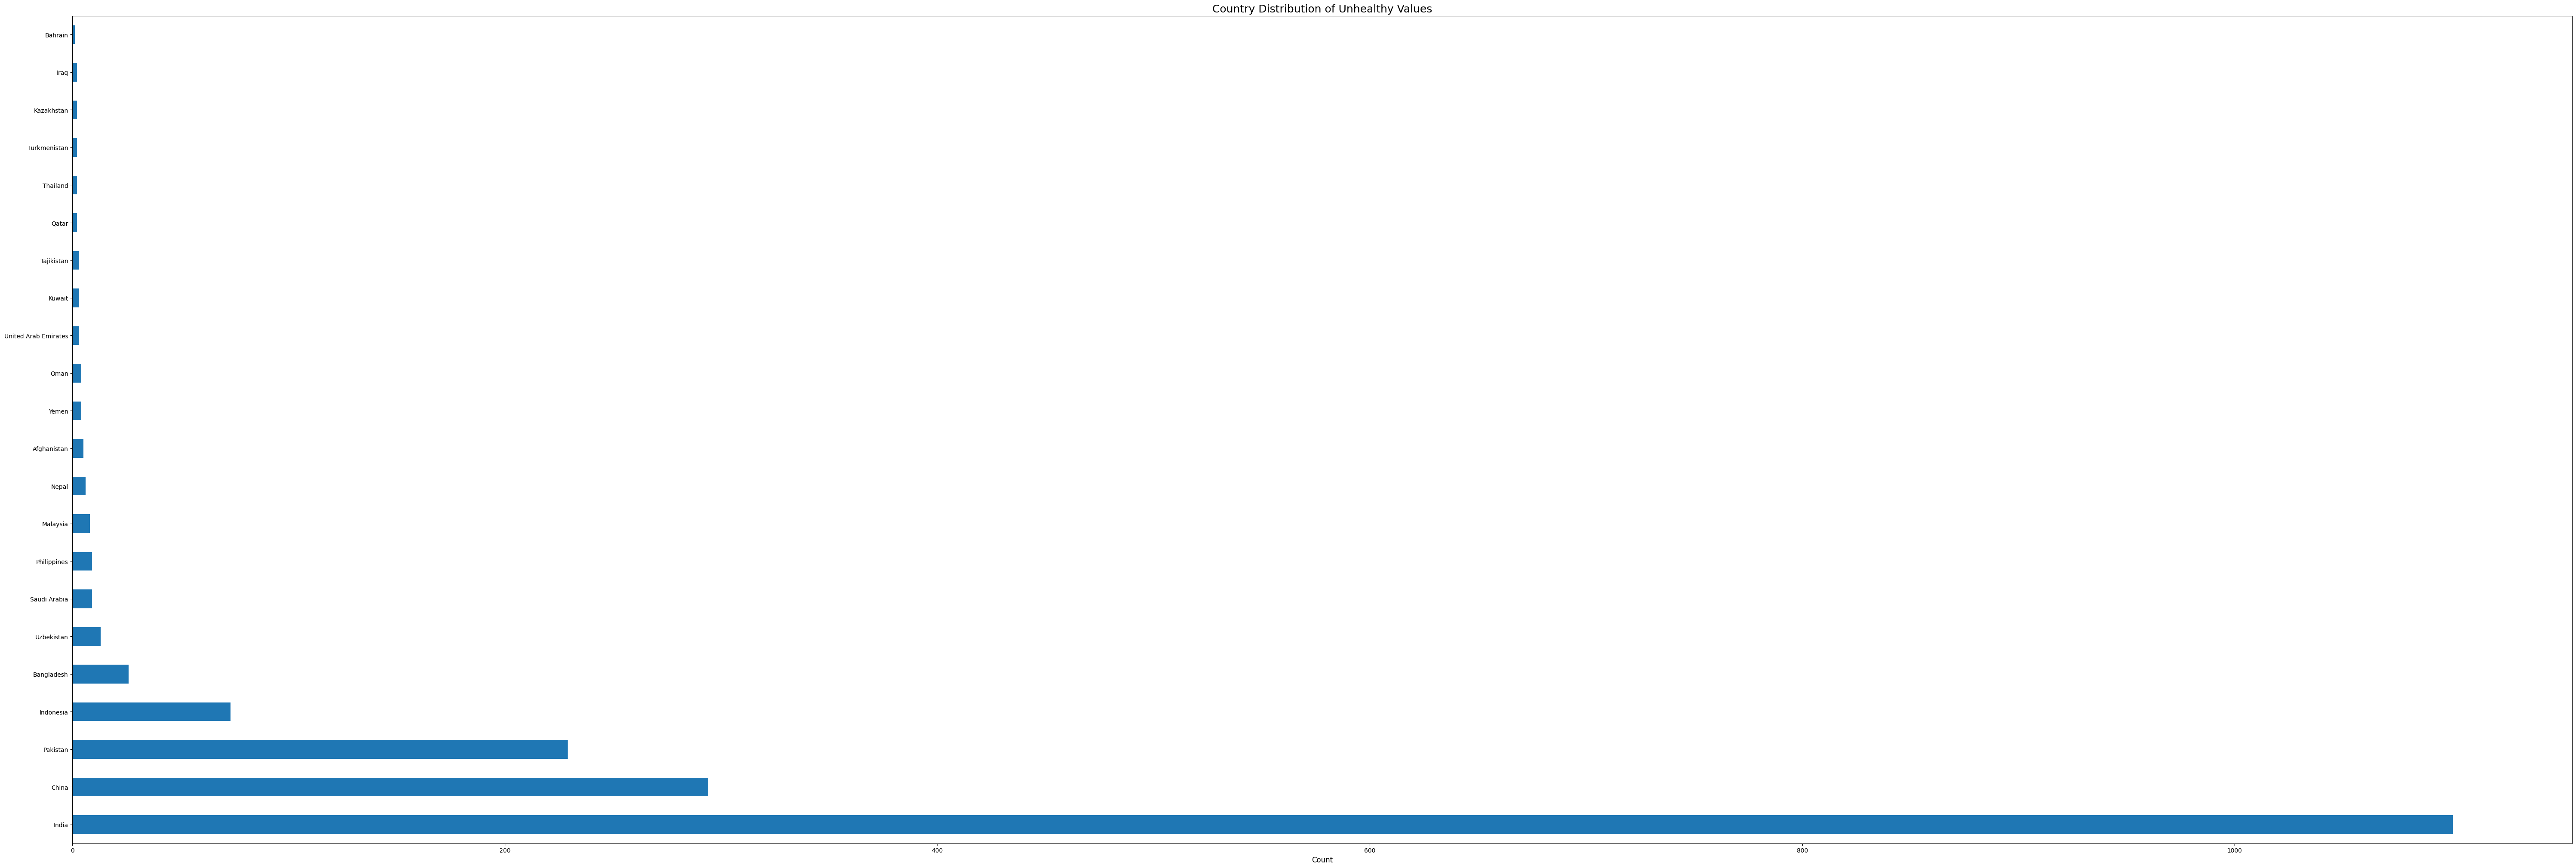

In [ ]:
plt.figure(figsize=(75, 25))
unh2_aqi["Country"].value_counts().plot(kind='barh')
plt.title(f'Country Distribution of Unhealthy Values', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
plt.show()

### Very Unhealthy (201 - 300)

In [ ]:
unh3_aqi = asia_df.sort_values("AQI Value", ascending=False)
unh3_aqi = unh3_aqi[unh3_aqi["AQI Category"] == "Very Unhealthy"]
unh3_aqi

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
12127,India,Naraina,297,Very Unhealthy,1,Good,40,Good,0,Good,297,Very Unhealthy,1
2300,India,Pinahat,297,Very Unhealthy,1,Good,54,Moderate,1,Good,297,Very Unhealthy,1
21343,Indonesia,Serpong,297,Very Unhealthy,14,Good,10,Good,51,Moderate,297,Very Unhealthy,1
12534,India,Gorakhpur,296,Very Unhealthy,3,Good,161,Unhealthy,1,Good,296,Very Unhealthy,1
2543,Pakistan,Toba Tek Singh,295,Very Unhealthy,1,Good,55,Moderate,1,Good,295,Very Unhealthy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12991,China,Heze,201,Very Unhealthy,5,Good,201,Very Unhealthy,4,Good,159,Unhealthy,1
5482,India,Chopan,201,Very Unhealthy,1,Good,47,Good,0,Good,201,Very Unhealthy,1
15736,China,Peikang,201,Very Unhealthy,3,Good,201,Very Unhealthy,4,Good,130,Unhealthy for Sensitive Groups,1
722,China,Kangshan,201,Very Unhealthy,3,Good,201,Very Unhealthy,4,Good,142,Unhealthy for Sensitive Groups,1


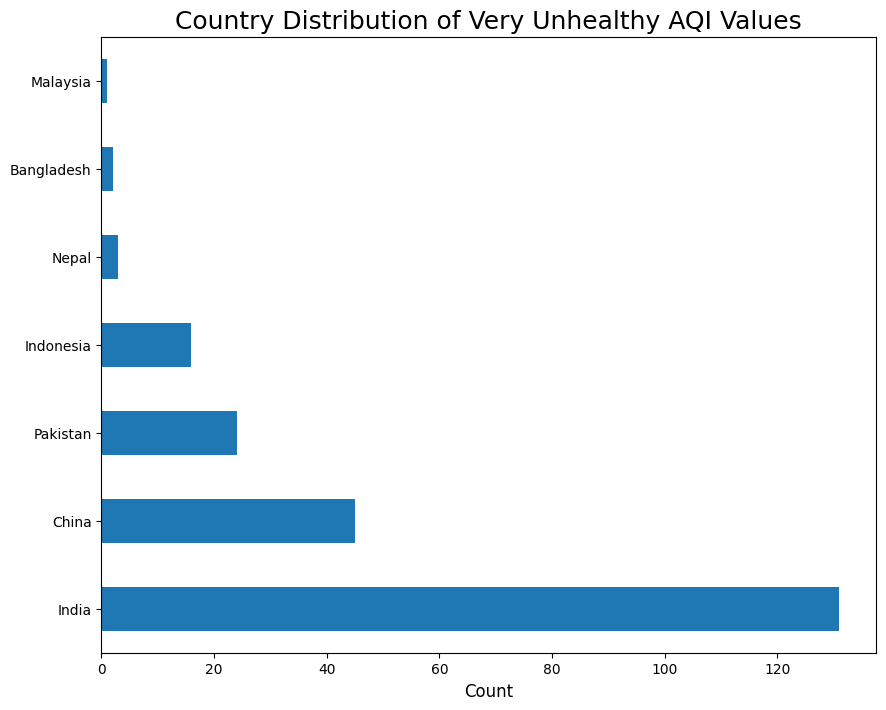

In [ ]:
plt.figure(figsize=(10, 8))
unh3_aqi["Country"].value_counts().plot(kind='barh')
plt.title(f'Country Distribution of Very Unhealthy AQI Values', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
plt.show()

### Hazardous (301+)

In [ ]:
hazar_aqi = asia_df.sort_values("AQI Value", ascending=False)
hazar_aqi = hazar_aqi[hazar_aqi["AQI Category"] == "Hazardous"]
hazar_aqi

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
714,India,Kakrala,500,Hazardous,2,Good,95,Moderate,2,Good,478,Hazardous,1
8832,India,Niwari,500,Hazardous,1,Good,46,Good,2,Good,492,Hazardous,1
524,India,Gohana,500,Hazardous,1,Good,47,Good,1,Good,500,Hazardous,1
13604,India,Puranpur,500,Hazardous,2,Good,128,Unhealthy for Sensitive Groups,1,Good,481,Hazardous,1
6990,India,Nuh,500,Hazardous,1,Good,44,Good,1,Good,420,Hazardous,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,India,Salon,303,Hazardous,1,Good,48,Good,0,Good,260,Very Unhealthy,1
13804,India,Waris Aliganj,302,Hazardous,1,Good,88,Moderate,1,Good,283,Very Unhealthy,1
15574,India,Jarwal,301,Hazardous,3,Good,153,Unhealthy,2,Good,301,Hazardous,1
1018,Pakistan,Faisalabad,301,Hazardous,1,Good,82,Moderate,1,Good,301,Hazardous,1


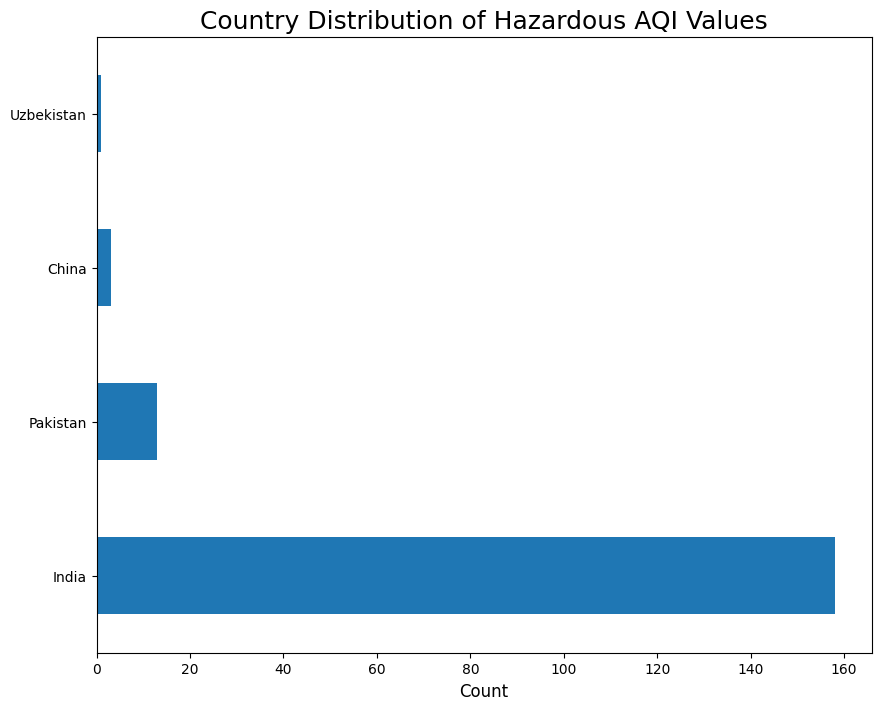

In [ ]:
plt.figure(figsize=(10, 8))
hazar_aqi["Country"].value_counts().plot(kind='barh')
plt.title(f'Country Distribution of Hazardous AQI Values', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
plt.show()

### Detail on Hazardous (400+)

Untuk mendapatkan wilayah dengan kualitas udara yang sangat berbahaya dan bisa menyebabkan kematian

In [ ]:
death_aqi = asia_df.sort_values("AQI Value", ascending=False)
death_aqi = death_aqi[death_aqi["AQI Value"] > 400]
death_aqi

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
714,India,Kakrala,500,Hazardous,2,Good,95,Moderate,2,Good,478,Hazardous,1
8832,India,Niwari,500,Hazardous,1,Good,46,Good,2,Good,492,Hazardous,1
524,India,Gohana,500,Hazardous,1,Good,47,Good,1,Good,500,Hazardous,1
13604,India,Puranpur,500,Hazardous,2,Good,128,Unhealthy for Sensitive Groups,1,Good,481,Hazardous,1
6990,India,Nuh,500,Hazardous,1,Good,44,Good,1,Good,420,Hazardous,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18047,India,Nahan,427,Hazardous,1,Good,106,Unhealthy for Sensitive Groups,1,Good,379,Hazardous,1
14150,India,Makhu,425,Hazardous,1,Good,93,Moderate,1,Good,379,Hazardous,1
1082,India,Hardoi,417,Hazardous,1,Good,49,Good,1,Good,323,Hazardous,1
803,India,Kishangarh,409,Hazardous,1,Good,44,Good,0,Good,356,Hazardous,1


In [ ]:
death_aqi["Country"].value_counts()

India       116
Pakistan      8
Name: Country, dtype: int64

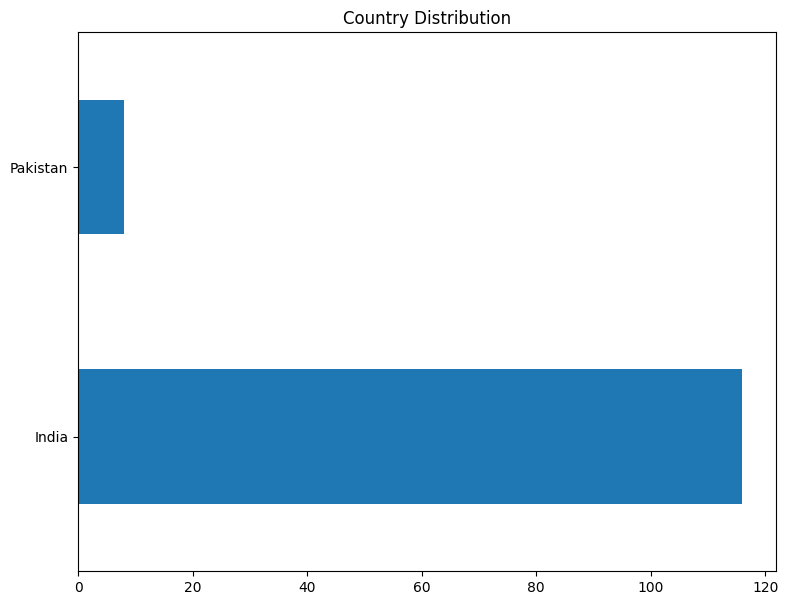

In [ ]:
plt.figure(figsize=(9, 7))
death_aqi["Country"].value_counts().plot(kind='barh')
plt.title(f'Country Distribution')
plt.ylabel('')
plt.show()

### Scatter plot akan AQI semua negara di Benua Asia untuk melihat persebaran AQI Value

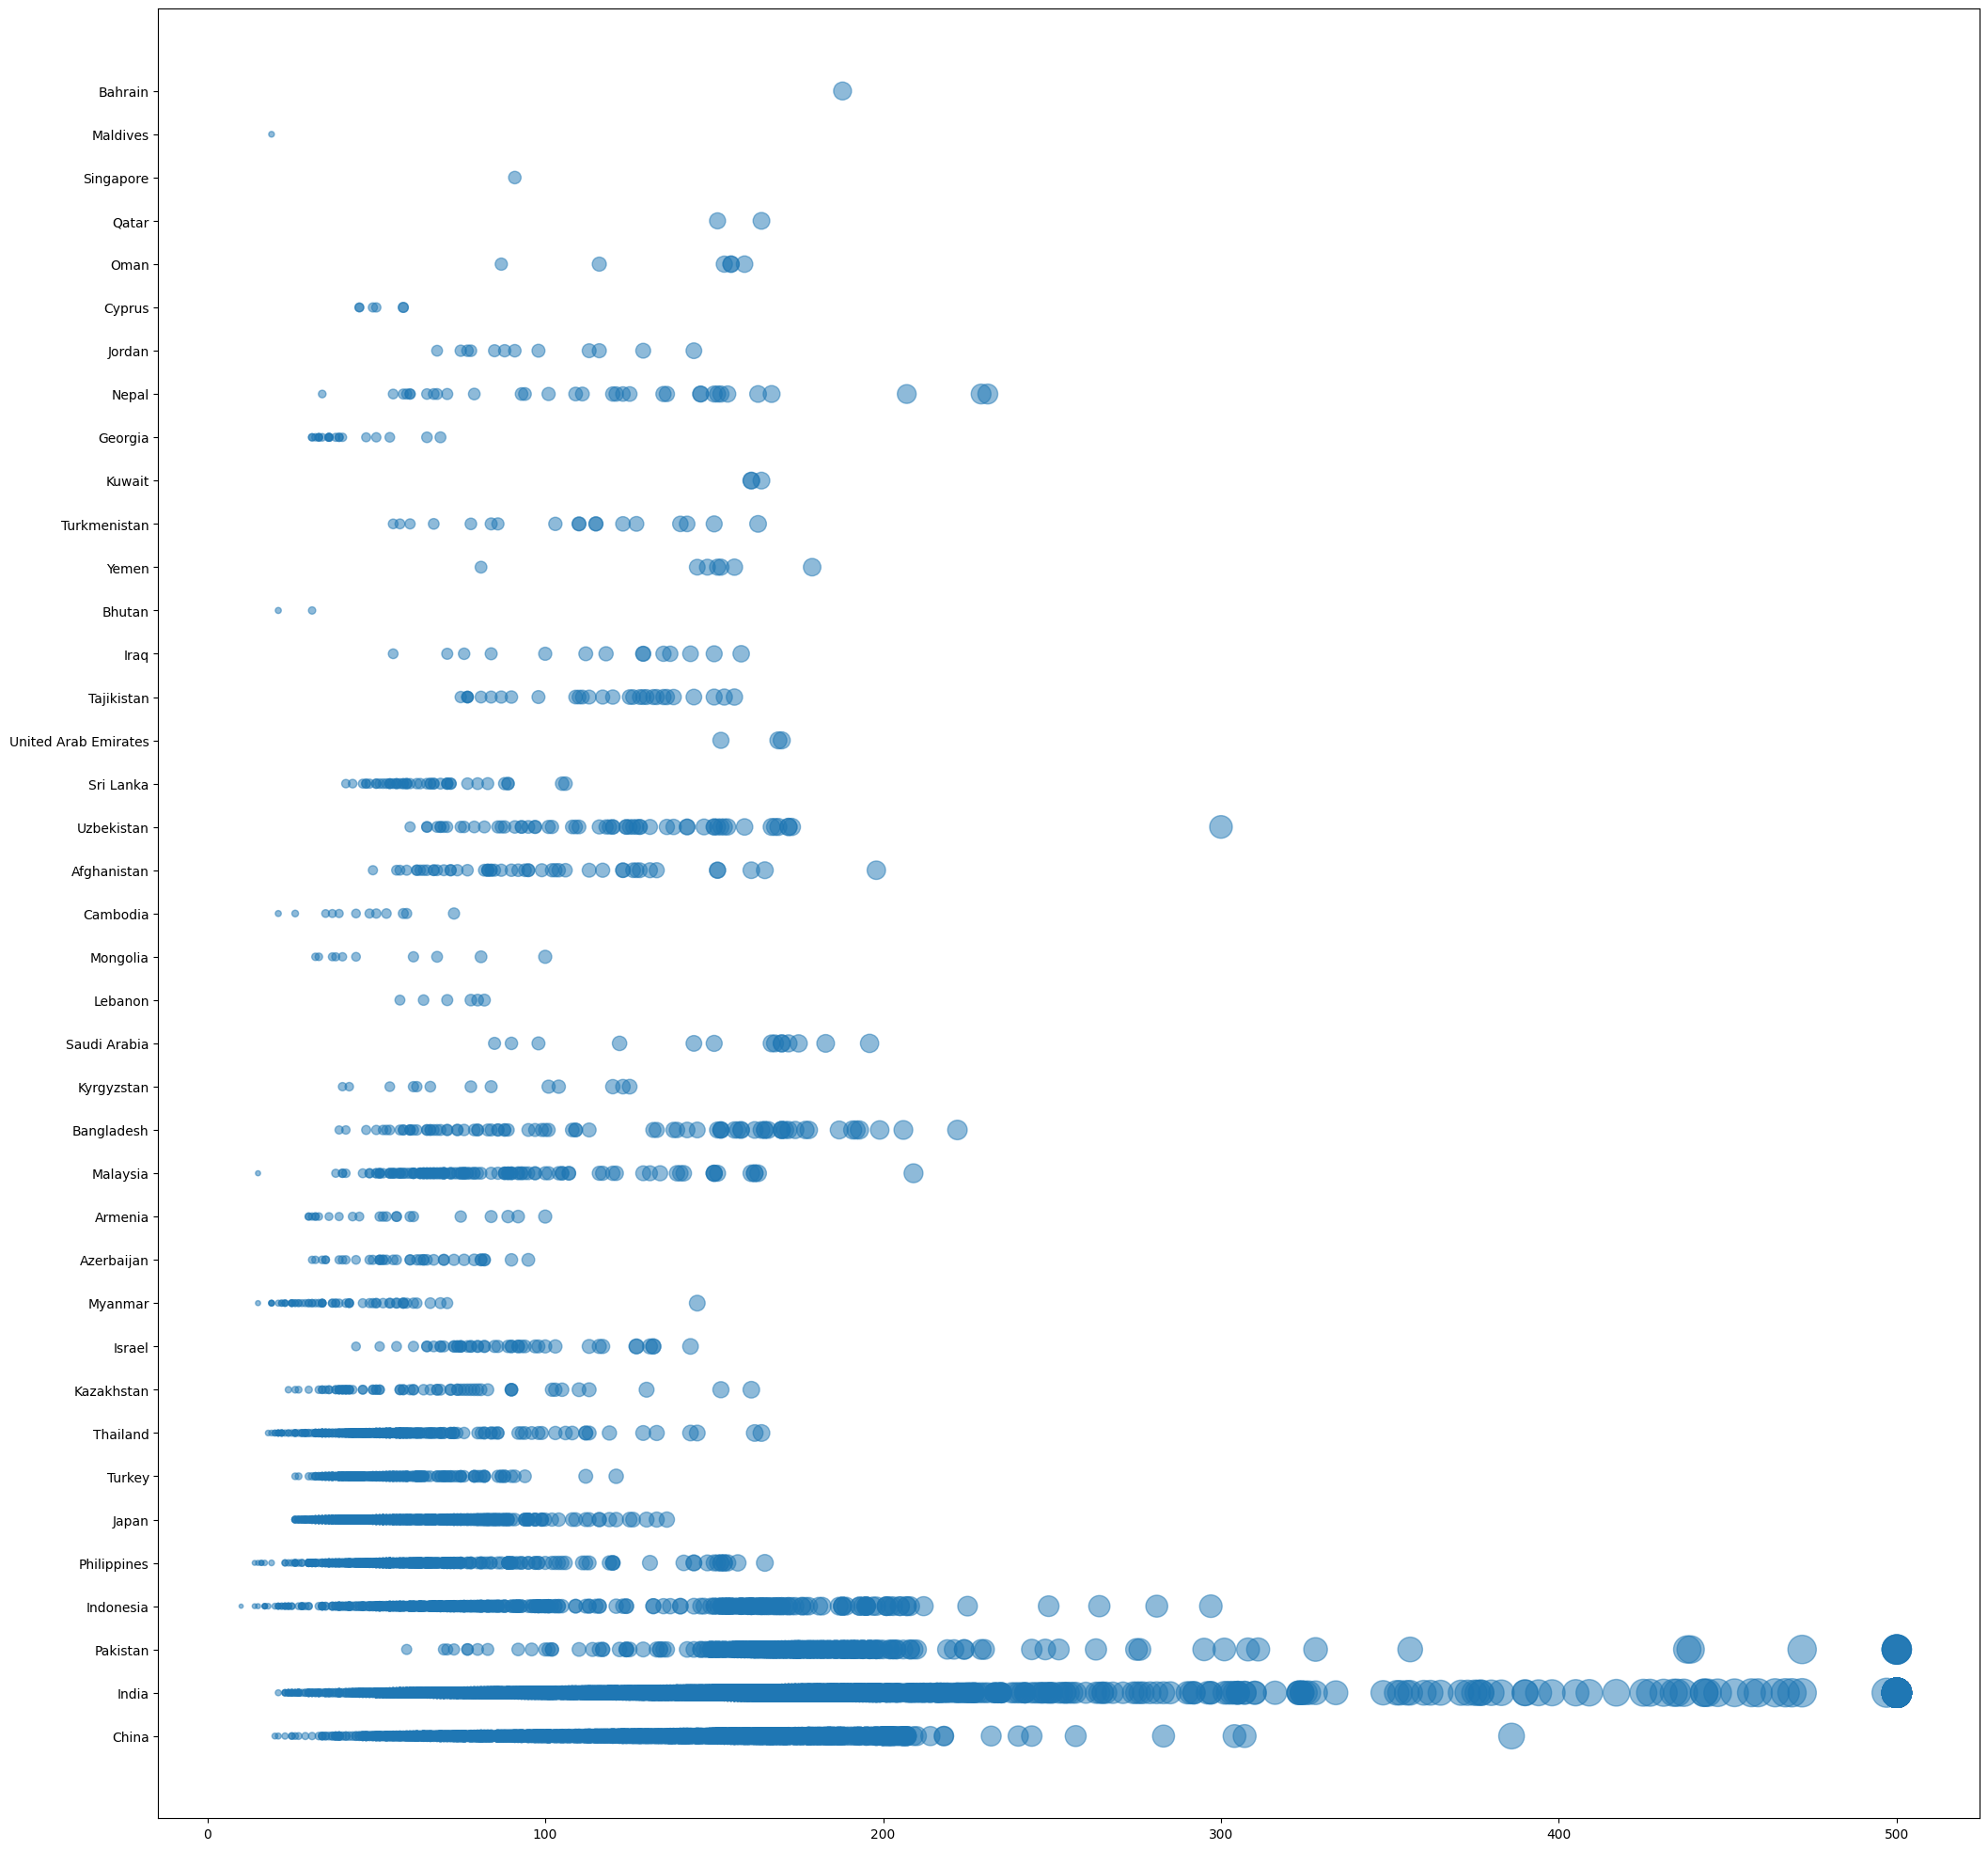

In [ ]:
plt.figure(figsize=(25, 25))
plt.scatter(x=asia_df["AQI Value"], y=asia_df["Country"], s=asia_df["AQI Value"], alpha=0.5)
plt.show()

### Kesimpulan negara dengan total wilayah kualitas udara yang buruk (AQI Value > 150)

In [ ]:
horrible_aqi = pd.concat([unh2_aqi, unh3_aqi, hazar_aqi], axis=0)
horrible_aqi.sort_values("AQI Value", ascending=False)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
941,Pakistan,Mailsi,500,Hazardous,1,Good,45,Good,0,Good,386,Hazardous,1
1127,India,Nagaur,500,Hazardous,0,Good,35,Good,0,Good,426,Hazardous,1
1968,India,Shamsabad,500,Hazardous,1,Good,75,Moderate,2,Good,433,Hazardous,1
22110,India,Surajgarh,500,Hazardous,1,Good,40,Good,0,Good,464,Hazardous,1
19706,India,Balotra,500,Hazardous,0,Good,31,Good,0,Good,398,Hazardous,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,Iraq,Rawah,150,Unhealthy,1,Good,38,Good,1,Good,150,Unhealthy,1
691,India,Indore,150,Unhealthy,1,Good,30,Good,0,Good,150,Unhealthy,1
13988,Pakistan,Gharo,150,Unhealthy,1,Good,31,Good,1,Good,150,Unhealthy,1
9859,India,Begusarai,150,Unhealthy,3,Good,52,Moderate,5,Good,150,Unhealthy,1


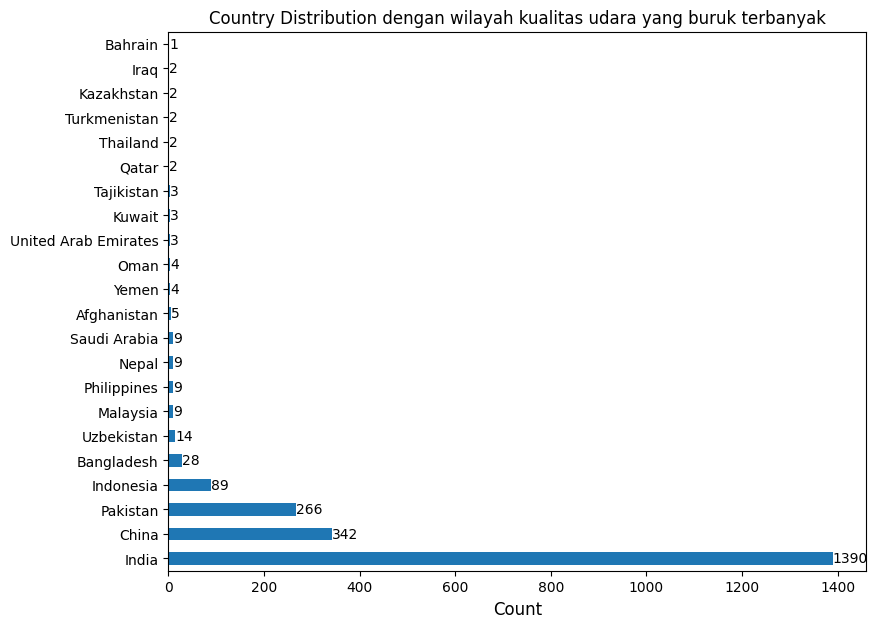

In [ ]:
plt.figure(figsize=(9, 7))
asia_ax_bad = horrible_aqi["Country"].value_counts().plot(kind='barh')
plt.title(f'Country Distribution dengan wilayah kualitas udara yang buruk terbanyak')
asia_ax_bad.bar_label(asia_ax_bad.containers[0], fontsize=10);
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
plt.show()

Dapat disimpulkan dari grafik tersebut, negara di Asia dengan representasi wilayah kualitas udara yang buruk (AQI Value > 201) adalah :
1. India (Asia Selatan) dengan 1390 kota
2. China (Asia Timur) dengan 342 kota
3. Pakistan (Asia Selatan) dengan 266 kota
4. Indonesia (Asia Tenggara)
5. Bangladesh (Asia Selatan)

Kalau berdasarkan regional daerah, maka negara dengan representasi terbanyak berdasarkan regional yaitu :
- Asia Timur => China (2nd)
- Asia Tengah => Uzbekistan (6th)
- Asia Tenggara => Indonesia (4th)
- Asia Selatan => India (1st)
- Asia Barat Daya (Timur Tengah) => Saudi Arabia (10th)

### Kesimpulan negara dengan total wilayah kualitas udara yang baik (AQI Value < 50)

In [ ]:
nice_aqi = pd.concat([good_aqi], axis=0)
nice_aqi.sort_values("AQI Value", ascending=False)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
20245,India,Vattalkundu,50,Good,1,Good,25,Good,0,Good,50,Good,1
9216,Kazakhstan,Ayagoz,50,Good,1,Good,33,Good,0,Good,50,Good,1
16187,China,Hsichih,50,Good,1,Good,31,Good,3,Good,50,Good,1
20950,China,Fulitun,50,Good,1,Good,41,Good,0,Good,50,Good,1
17182,Thailand,Selaphum,50,Good,1,Good,28,Good,0,Good,50,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Myanmar,Loikaw,15,Good,0,Good,15,Good,0,Good,10,Good,1
935,Philippines,Lun,15,Good,0,Good,15,Good,0,Good,15,Good,1
17529,Philippines,Panacan,14,Good,1,Good,14,Good,0,Good,10,Good,1
15063,Indonesia,Rantepao,14,Good,0,Good,14,Good,0,Good,14,Good,1


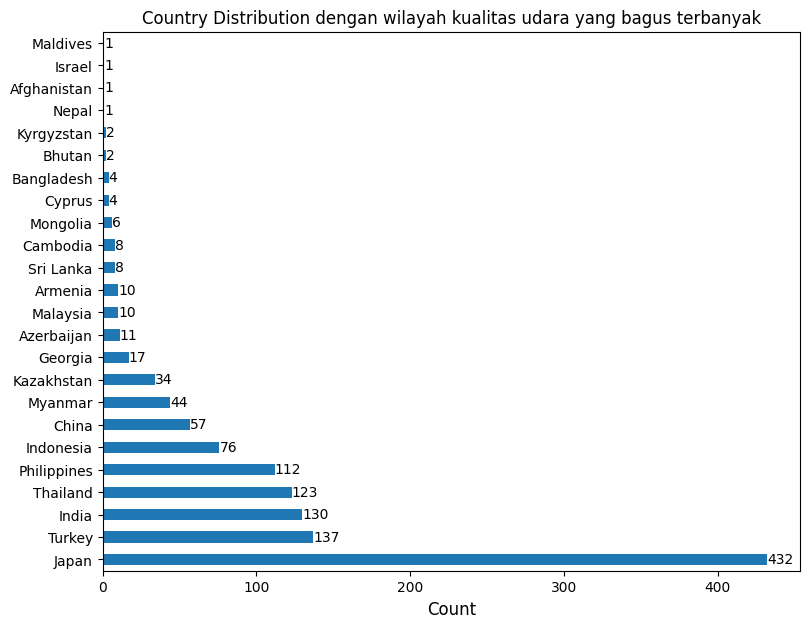

In [ ]:
plt.figure(figsize=(9, 7))
asia_ax_good = nice_aqi["Country"].value_counts().plot(kind='barh')
plt.title(f'Country Distribution dengan wilayah kualitas udara yang bagus terbanyak')
asia_ax_good.bar_label(asia_ax_good.containers[0], fontsize=10);
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
plt.show()

Dapat disimpulkan dari grafik tersebut, negara di Asia dengan representasi wilayah kualitas udara yang buruk (AQI Value > 201) adalah :
1. Japan (Asia Timur) dengan 432 kota
2. Turkey (Asia Barat Daya) dengan 137 kota
3. India (Asia Selatan) dengan 130 kota
4. Thailand (Asia Tenggara)
5. Philippines (Asia Tenggara)

Kalau berdasarkan regional daerah, maka negara dengan representasi terbanyak berdasarkan regional yaitu :
- Asia Timur => Japan (1st)
- Asia Tengah => Kazakhtan (9th)
- Asia Tenggara => Thailand (4th)
- Asia Selatan => India (3rd)
- Asia Barat Daya (Timur Tengah) => Turki (2nd)

Detail akan kota dengan kualitas terbaik (AQI < 20)

*   Item daftar
*   Item daftar



In [ ]:
very_good_aqi = good_aqi[good_aqi["AQI Value"] < 20]
very_good_aqi.sort_values("AQI Value", ascending=False)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,In Asia
1895,Philippines,Alabel,19,Good,0,Good,16,Good,0,Good,19,Good,1
8785,Myanmar,Banmo,19,Good,1,Good,18,Good,0,Good,19,Good,1
15429,Maldives,Male,19,Good,0,Good,19,Good,0,Good,15,Good,1
6608,Myanmar,Katha,19,Good,1,Good,19,Good,0,Good,18,Good,1
20446,Thailand,Bang Saphan,19,Good,1,Good,16,Good,0,Good,19,Good,1
12174,Myanmar,Mawlaik,19,Good,1,Good,19,Good,0,Good,11,Good,1
15445,Thailand,Mae Sot,18,Good,0,Good,18,Good,0,Good,16,Good,1
15441,Indonesia,Luwuk,18,Good,0,Good,18,Good,0,Good,9,Good,1
951,Philippines,Margosatubig,17,Good,0,Good,16,Good,0,Good,17,Good,1
3416,Indonesia,Bone,17,Good,0,Good,17,Good,0,Good,14,Good,1


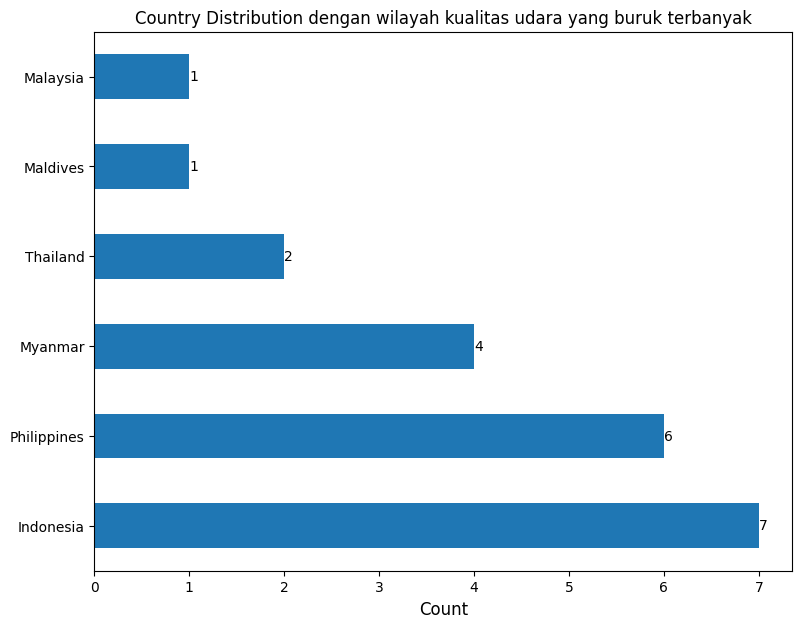

In [ ]:
plt.figure(figsize=(9, 7))
asia_ax_very_good = very_good_aqi["Country"].value_counts().plot(kind='barh')
plt.title(f'Country Distribution dengan wilayah kualitas udara yang terbaik')
asia_ax_very_good.bar_label(asia_ax_very_good.containers[0], fontsize=10);
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
plt.show()

Tetapi melihat daerah dengan kualitas udara terbaik, negara dari wilayah Asia Tenggara mendominasi melihat 3 negara dengan jumlah kota kualitas udara terbaik dimiliki Indonesia, Philippines dan Myanmar.

Negara yang berasal dari luar Asia Tengara adalah Maldives

Tapi perlu dicatat bahwa negara Asia Tenggara seperti Indonesia dan Filipina juga muncul di kota terburuk yang disebabkan negara tersebut juga memiliki kualitas udara yang buruk.

Hal ini juga berlaku untuk India di posisi ketiga negara terbaik kualitas udaranya dimana itu menandakan secara keseluruhan, India memiliki banyak kota yang bersih, tetapi banyak yang lebih buruk.

## (2nd) Persebaran Kualitas Udara AQI berdasarkan kandungan gas (NO2, O3, CO, dan PM2.5)

In [ ]:
def histoplot_aqi_value(data, columns, detail=""):
  for column in columns:
    plt.figure(figsize=(9, 7))
    sns.histplot(data=data, x=column, bins=20, kde=True)
    plt.title(f"Persebaran dari {column} {detail}", fontsize=18)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("count", fontsize=12)
    plt.show()

### Histogram persebaran dari AQI Value berdasarkan kandungan gas Seluruh Dunia

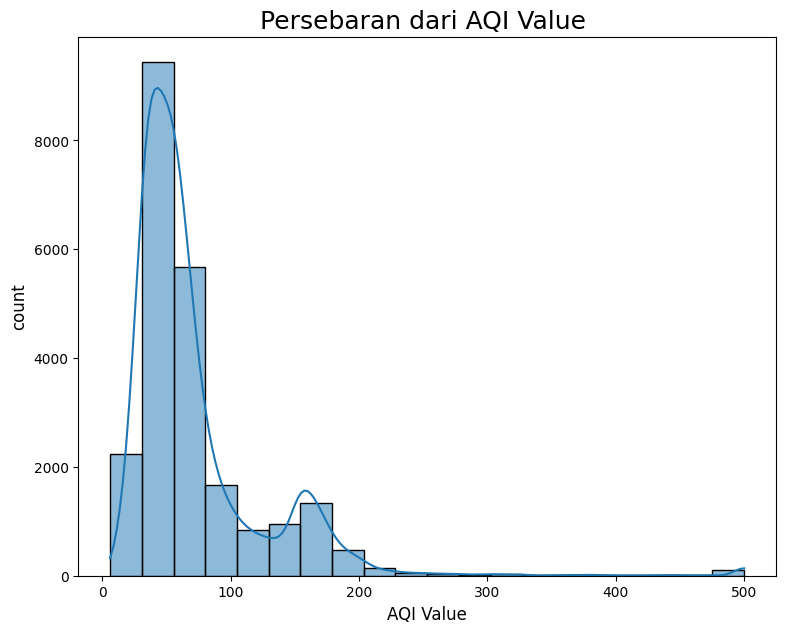

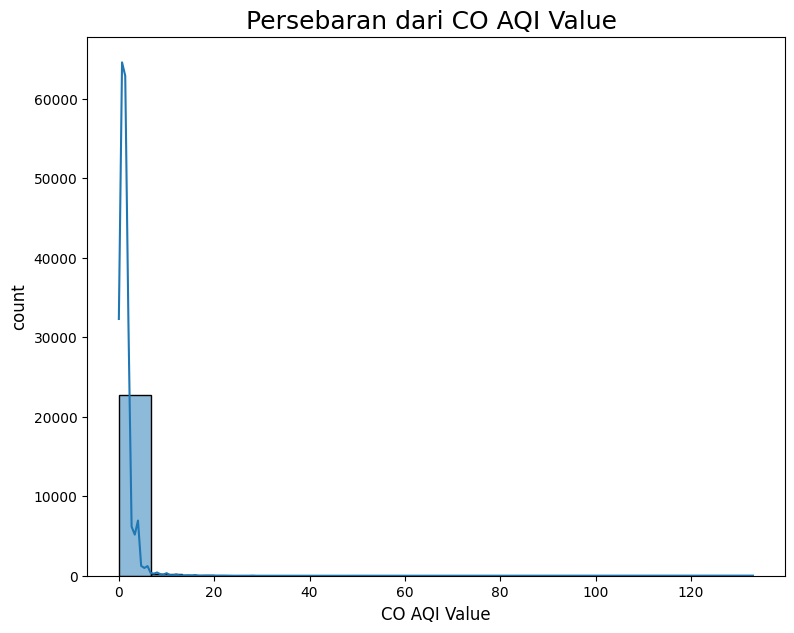

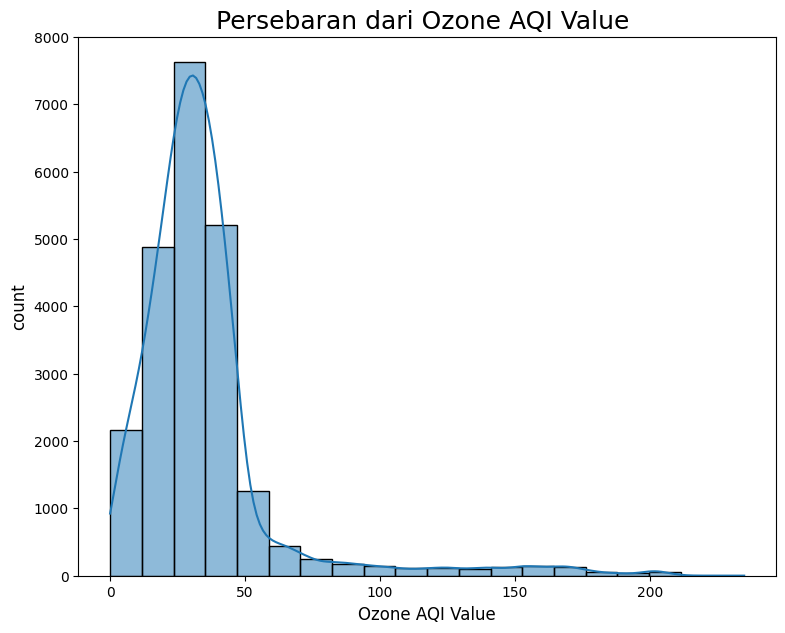

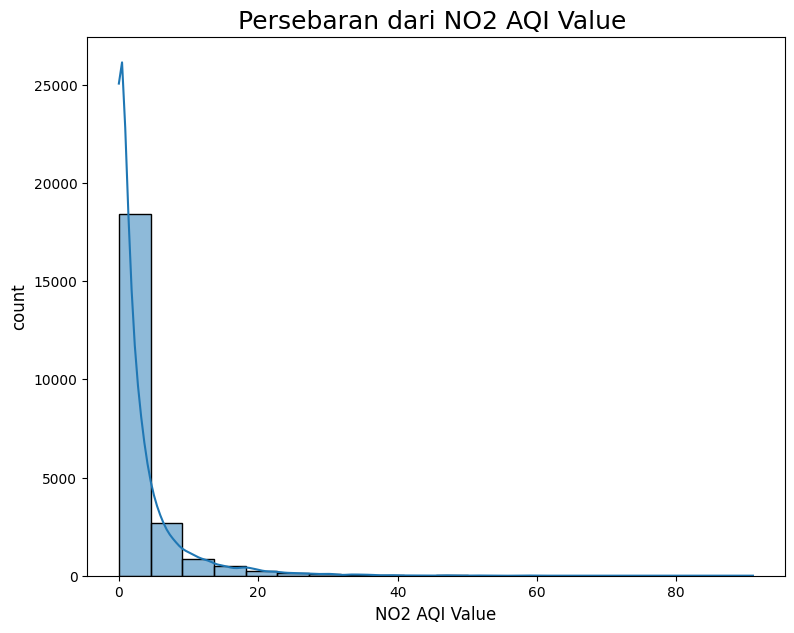

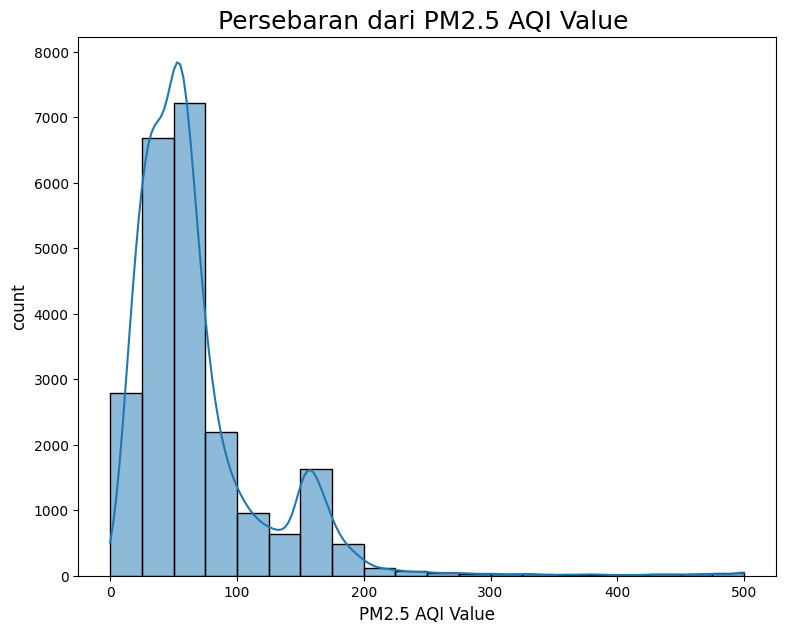

In [ ]:
histoplot_aqi_value(df, integer_columns)

### Histogram persebaran dari AQI Value berdasarkan kandungan gas negara di Benua Asia

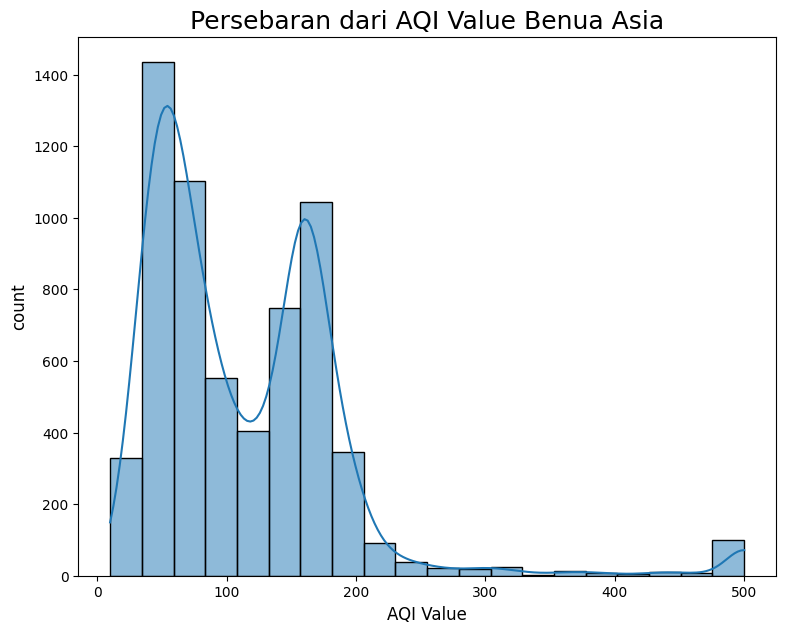

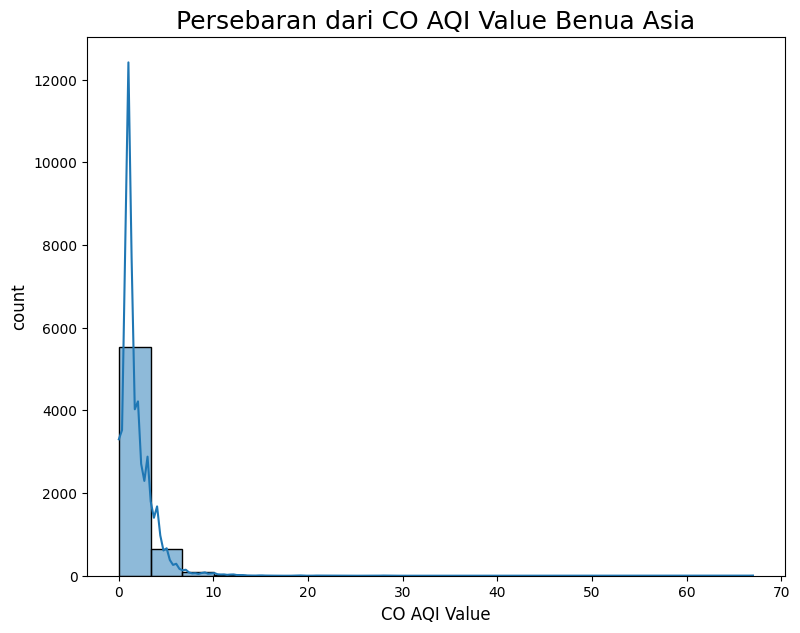

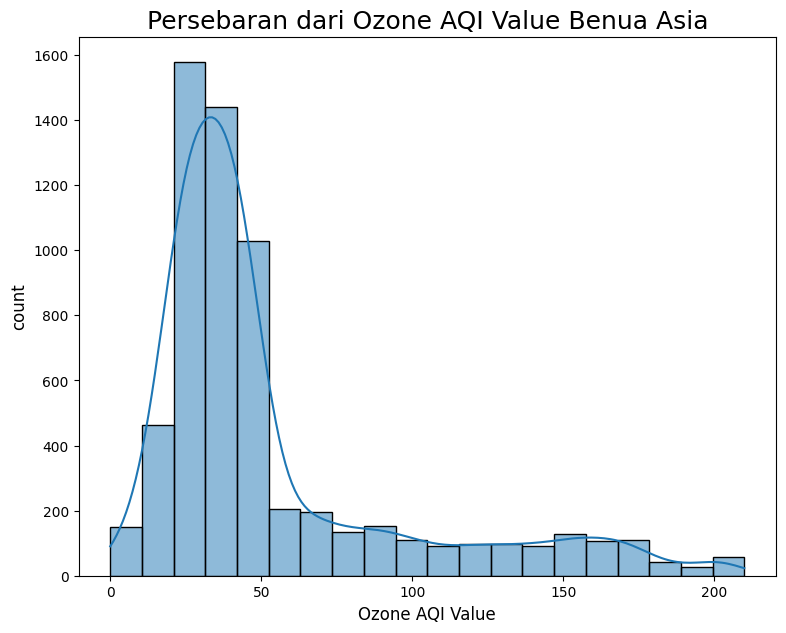

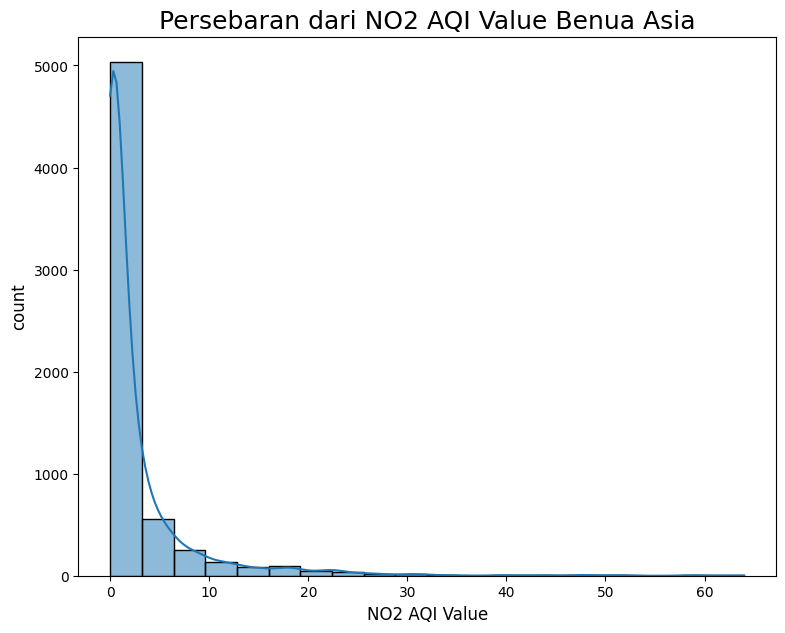

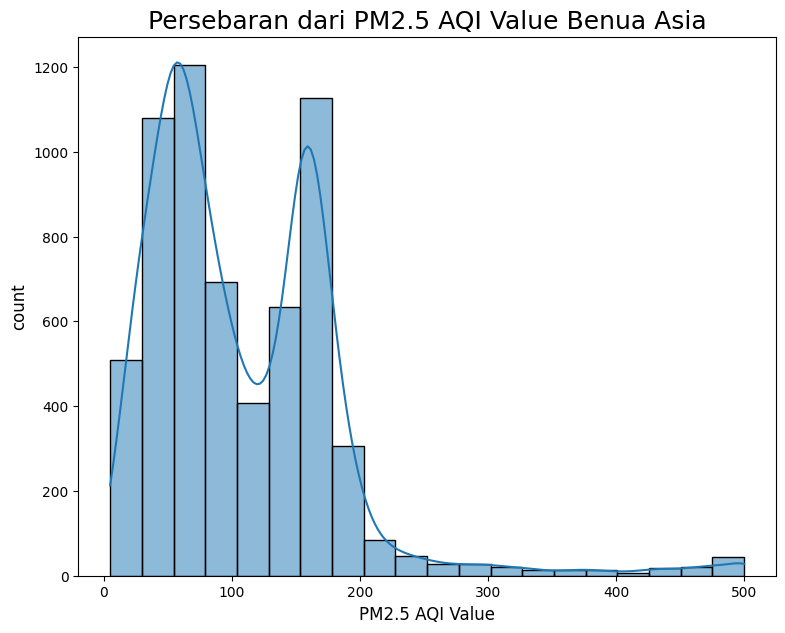

In [ ]:
histoplot_aqi_value(asia_df, integer_columns, "Benua Asia")

Melihat dari persebaran di seluruh dunia dan di Benua Asia sendiri, dapat disimpulkan dimana Asia menyumbang besar di range Unhealthy certain group dan Unhealthy yang terbesar terutama kualitas udara terburuk.

## (3nd) Bagaimana Kualitas Udara di Benua Asia dibandingkan dengan belahan dunia lainnya

### Histogram persebaran AQI Value berdasarkan kandungan gas negara (Hue Asia vs Seluruh Dunia)

0 = Negara non Asia (Amerika, Afrika, Eropa, Australia)<br>
1 = Negara Asia

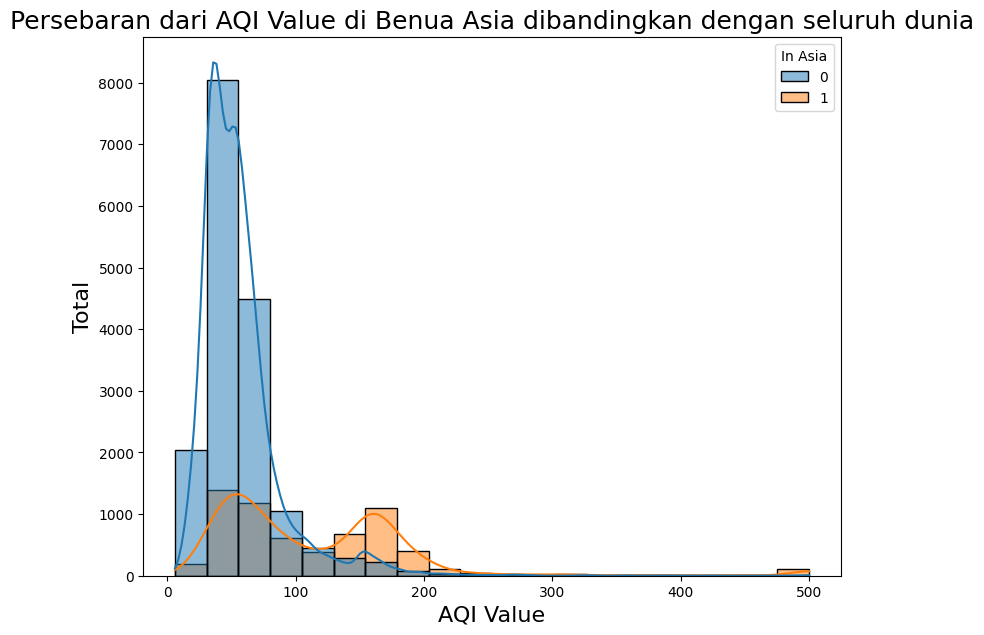

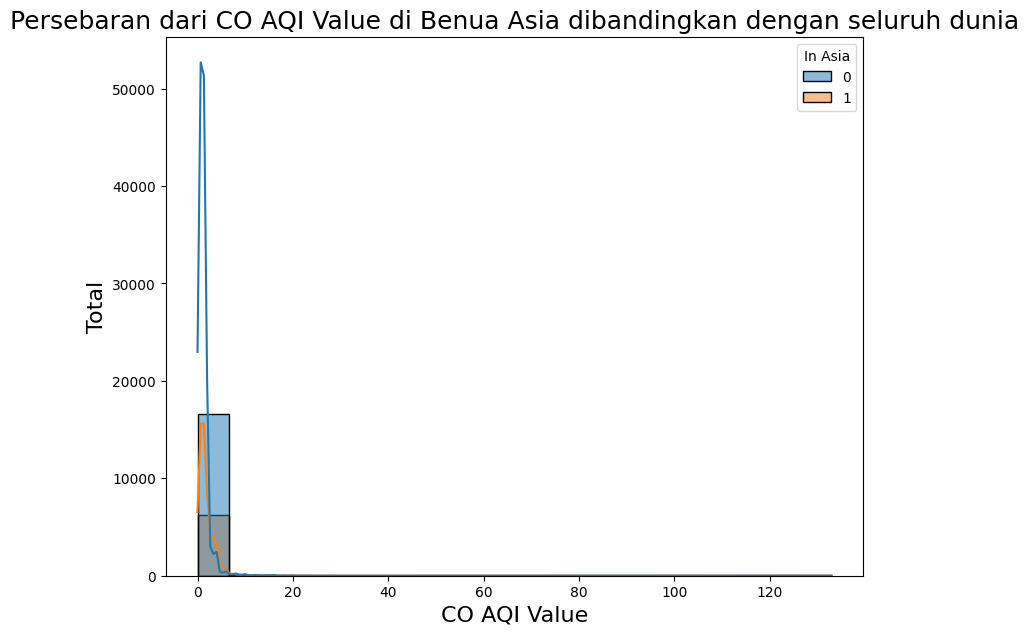

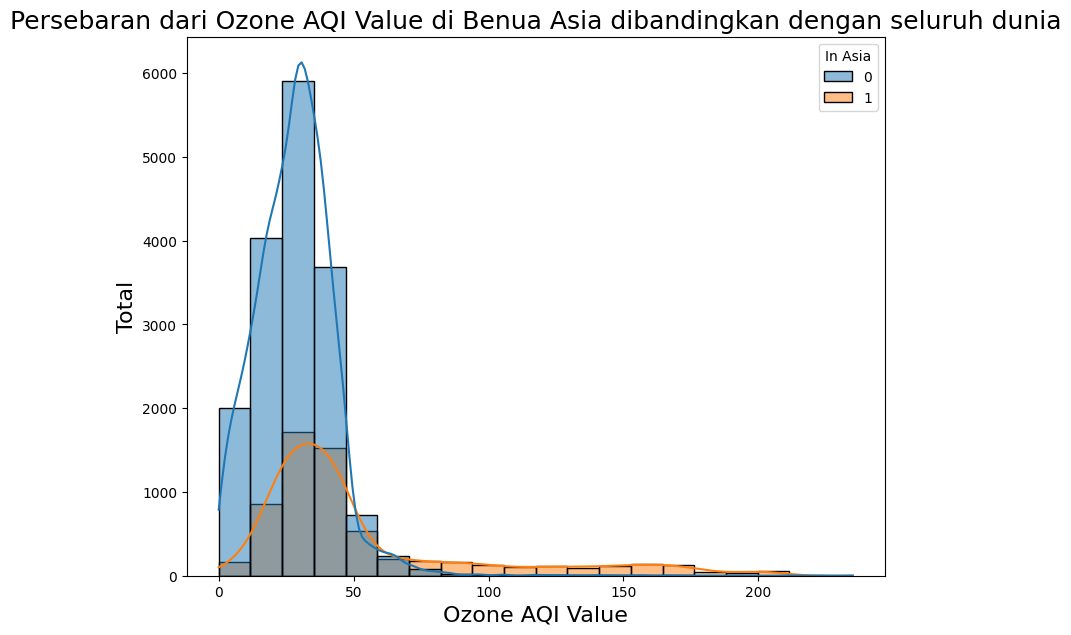

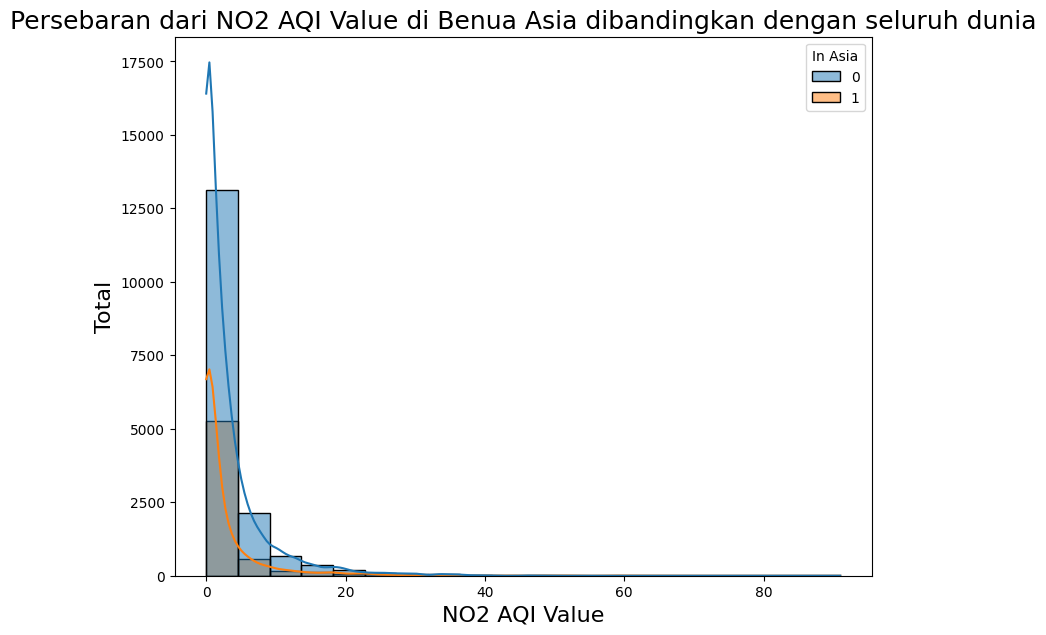

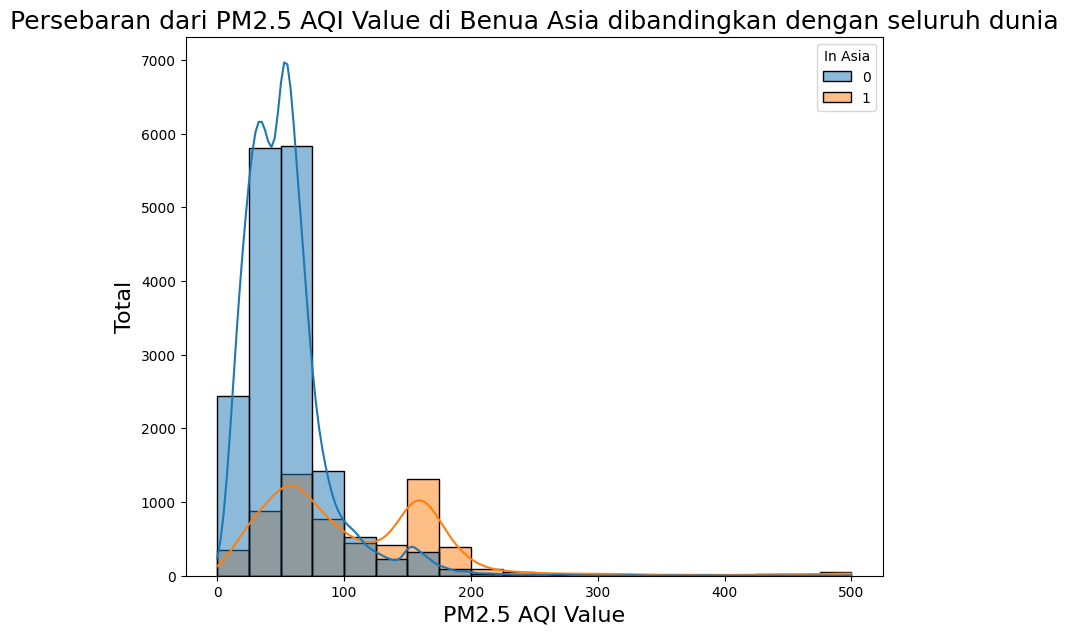

In [ ]:
for column in integer_columns:
  plt.figure(figsize=(9, 7))
  sns.histplot(data=df, x=column, hue="In Asia", bins=20, kde=True)
  plt.title(f"Persebaran dari {column} di Benua Asia dibandingkan dengan seluruh dunia", fontsize=18)
  plt.xlabel(column, fontsize=16)
  plt.ylabel("Total", fontsize=16)
  plt.show()

Disini terlihat bahwa negara dalam range yang masih baik (0 - 100) benua Asia juga cukup menyumbang tetapi lebih besar terlihat di range atas (150 > x) banyak disumbang oleh negara Asia melihat range 150 - 175 AQI di representasi oleh negara Asia dan range Hazardous di representasi terbanyak negara Asia seperti India dan Pakistan

### Histogram persebaran AQI Value berdasarkan kandungan gas negara (Hue Asia vs Seluruh Dunia) (Unhealth > 150)

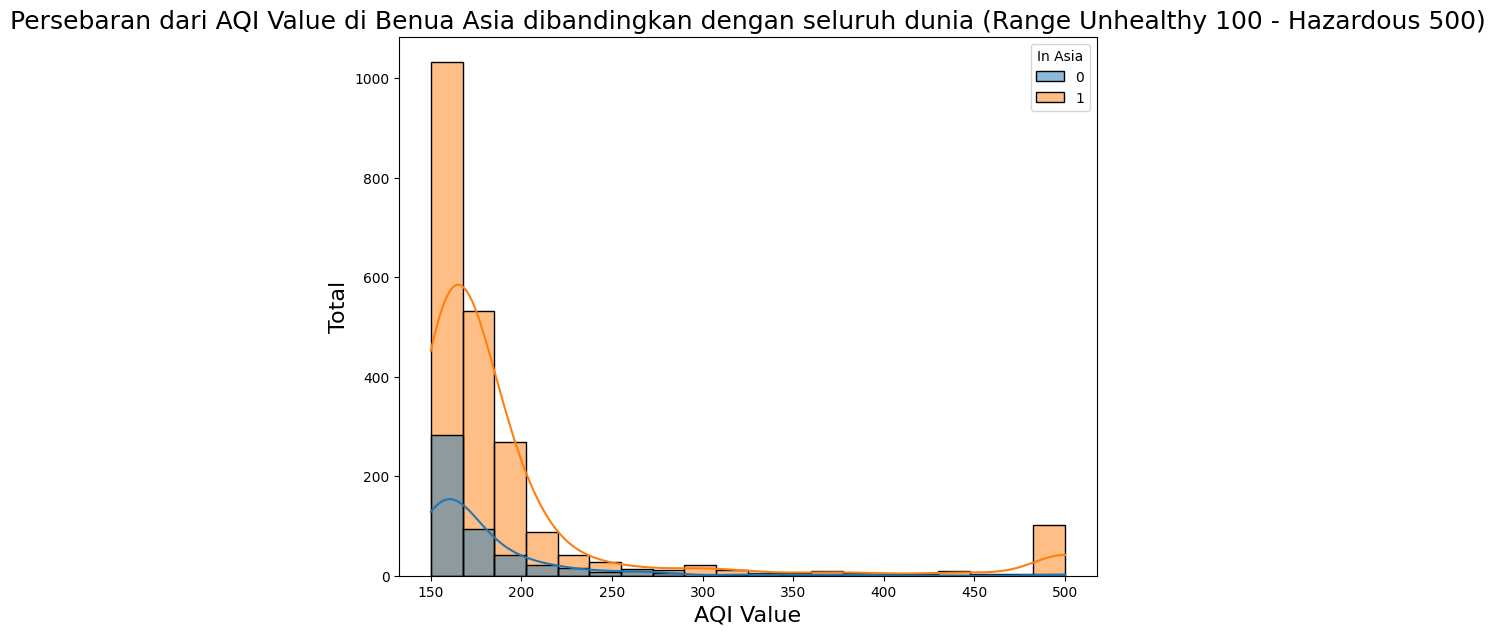

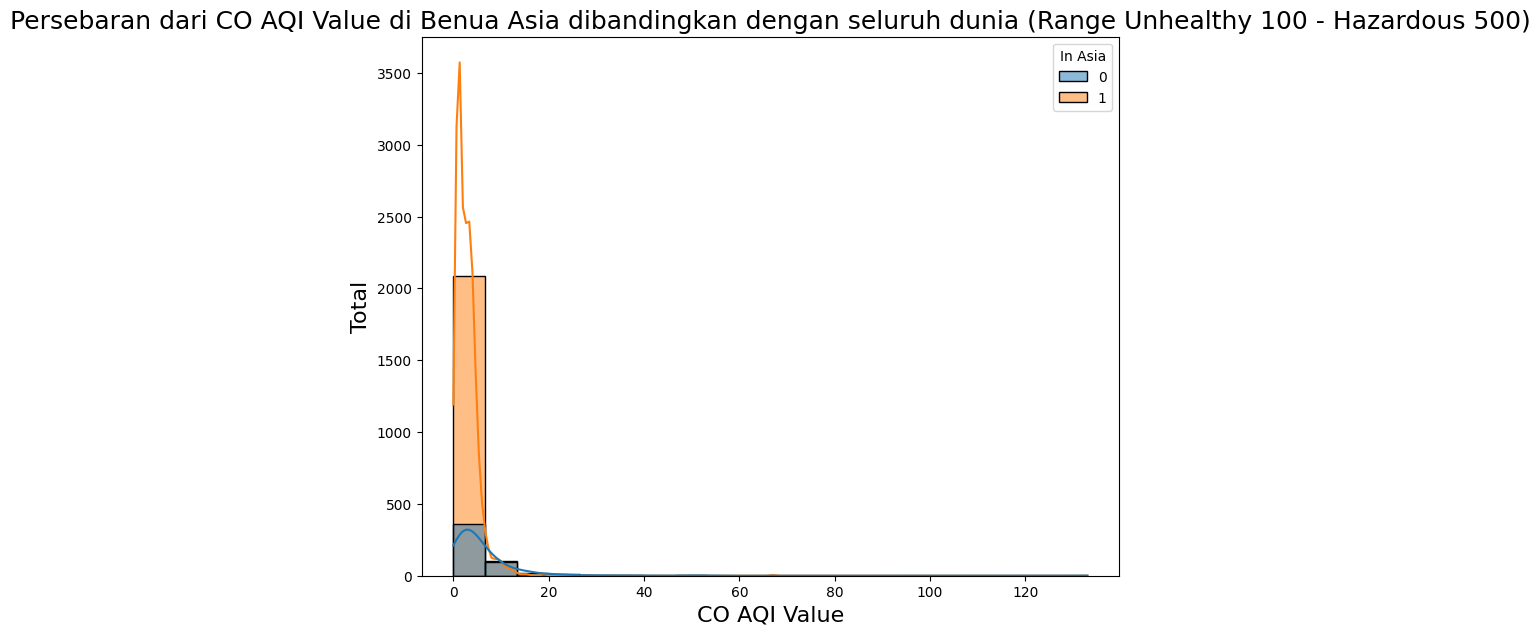

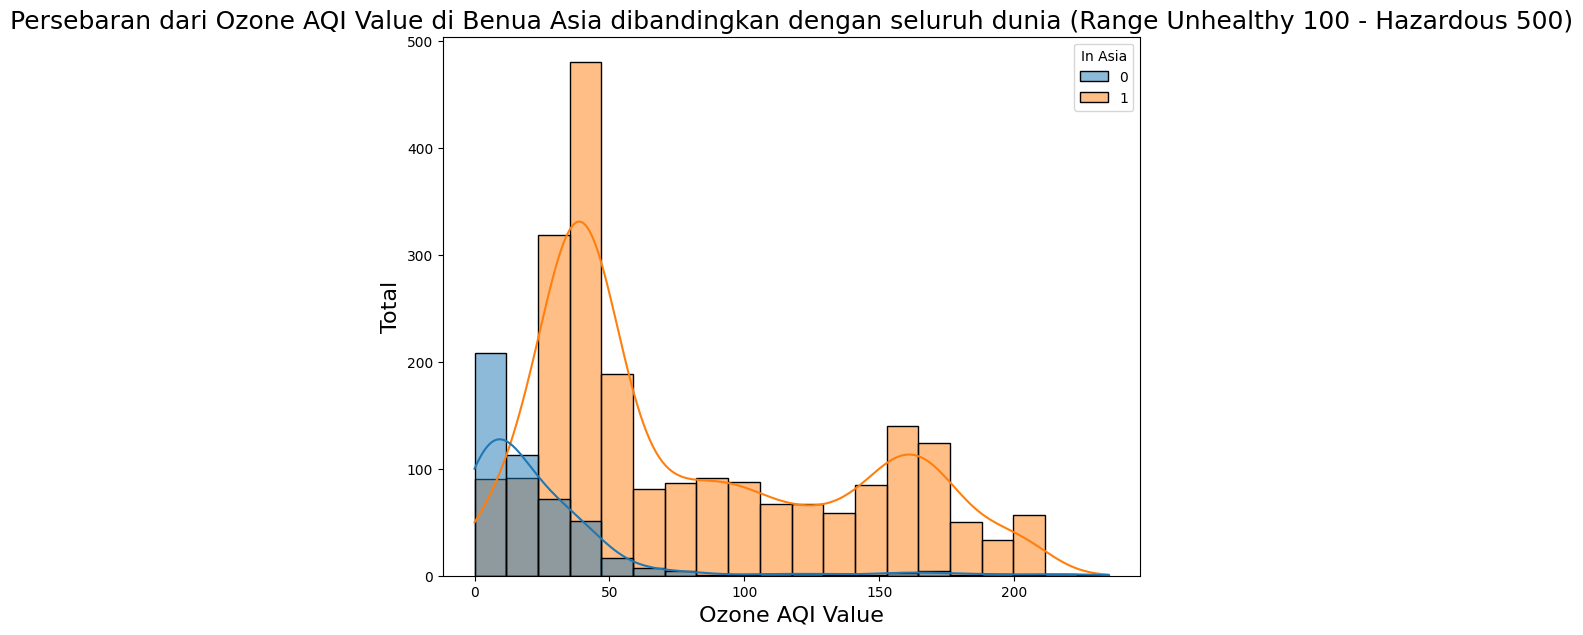

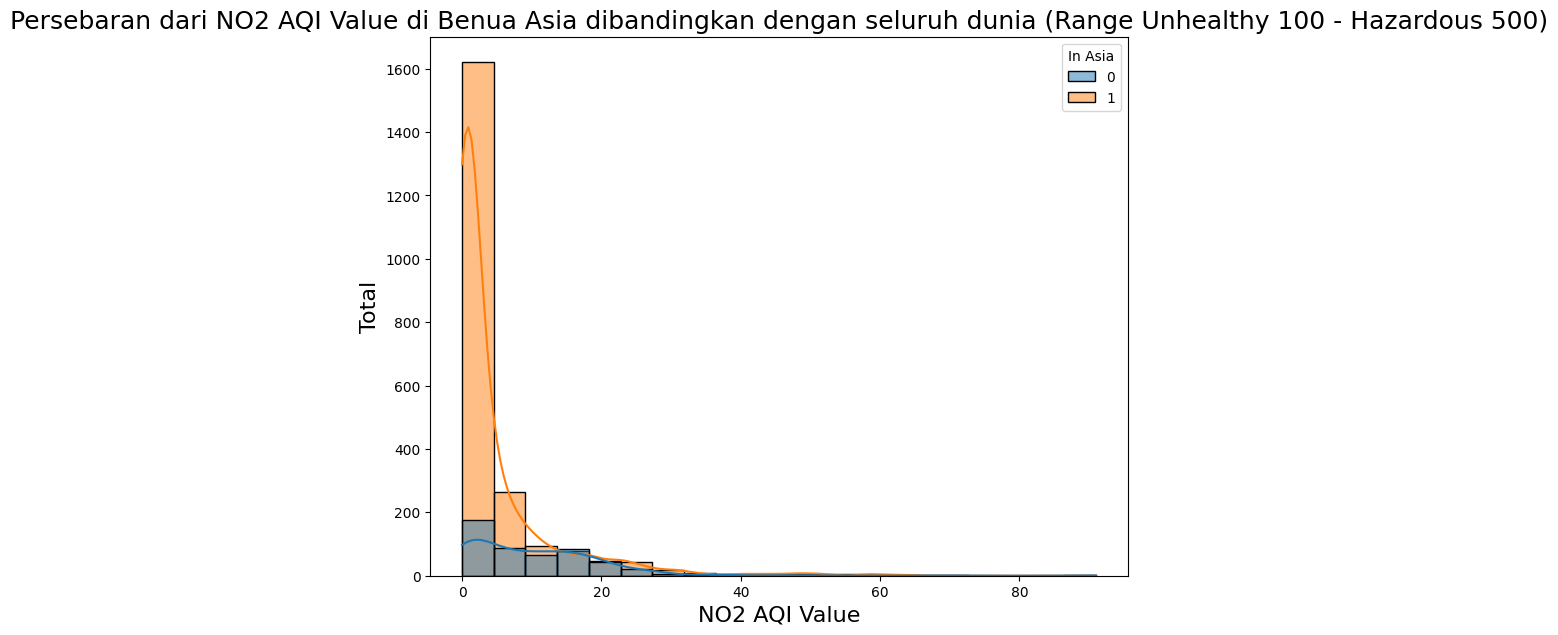

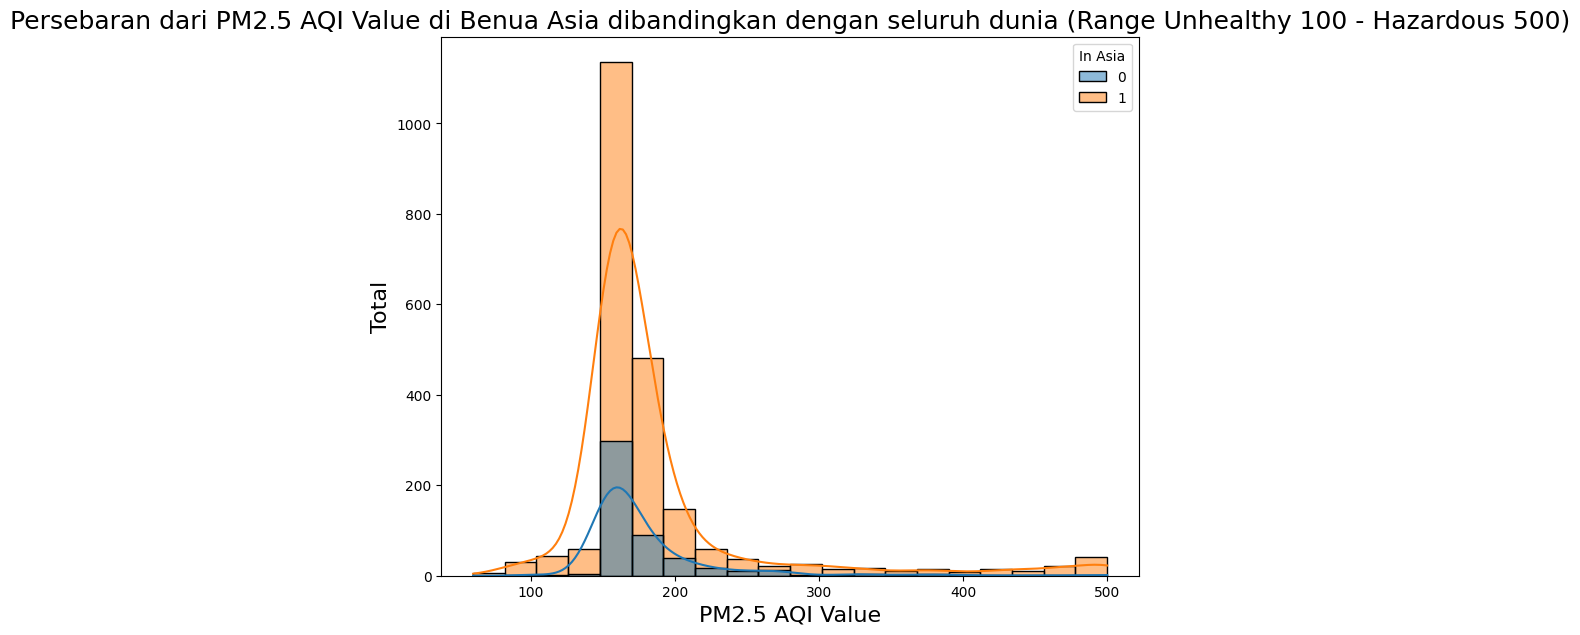

In [ ]:
for column in integer_columns:
  plt.figure(figsize=(9, 7))
  sns.histplot(data=df[df["AQI Value"] >= 150], x=column, hue="In Asia", bins=20, kde=True)
  plt.title(f"Persebaran dari {column} di Benua Asia dibandingkan dengan seluruh dunia (Range Unhealthy 100 - Hazardous 500)", fontsize=18)
  plt.xlabel(column, fontsize=16)
  plt.ylabel("Total", fontsize=16)
  plt.show()

Ketika kita melihat lebih detail di range yang tidak sehat, maka kita seberapa besar representasi negara Asia dalam kualitas udara yang terburuk baik secara keseluruhan, indeks NO2, CO, Ozone dan PM2.5 (Konsentrasi Partikulat)